In [20]:
import pandas as pd
df = pd.read_csv("Bangalore_1Day_NETC.csv")

In [21]:
df.head()

,SlNo.,merchant_name,direction,lane,tag_id,vehicle_regn_number,txn_amount,initiated_time,inn_rr_time_sec,vehicle_class_code,vehicle_comvehicle,geocode,merchant_sub_type,city,state
0,1,Bannerghatta Road (P2) Plaza,S,P2BX2,HXYUH,YFUNB,225,00-01-1900 21:54,994,VC4,F,"12.850056,77.588333",State,Bengaluru,Karnataka
1,2,Bannerghatta Road (P2) Plaza,S,P2BX2,JGEFQ,GQHLZ,225,00-01-1900 18:59,4528,VC20,T,"12.850056,77.588333",State,Bengaluru,Karnataka
2,3,Bannerghatta Road (P2) Plaza,S,P2BX2,VOAPH,DNTMI,150,00-01-1900 00:14,134,VC5,F,"12.850056,77.588333",State,Bengaluru,Karnataka
3,4,Kadathanamale Toll Plaza,S,LANE09,XBANK,ZMAOY,35,00-01-1900 18:19,80,VC20,F,"13.2123515,77.5535138",state,Bangalore,Karnataka
4,5,Kadathanamale Toll Plaza,S,LANE10,HMWDZ,IDSRZ,20,00-01-1900 15:03,64,VC4,F,"13.2123515,77.5535138",state,Bangalore,Karnataka


In [22]:
print(df.columns)  # This will list all available columns


Index(['SlNo.', 'merchant_name', 'direction', 'lane', 'tag_id',
       'vehicle_regn_number', 'txn_amount', 'initiated_time',
       'inn_rr_time_sec', 'vehicle_class_code', 'vehicle_comvehicle',
       'geocode', 'merchant_sub_type', 'city', 'state'],
      dtype='object')


In [23]:
df['initiated_time'] = df['initiated_time'].astype(str).str.replace('00-01-1900', '').str.strip()

# 2. Convert the cleaned time string to datetime (time only)
df['initiated_time'] = pd.to_datetime(df['initiated_time'], format='%H:%M')
print(df[['initiated_time']].head())
print(f"\nData type after conversion: {df['initiated_time'].dtype}")

       initiated_time
0 1900-01-01 21:54:00
1 1900-01-01 18:59:00
2 1900-01-01 00:14:00
3 1900-01-01 18:19:00
4 1900-01-01 15:03:00

Data type after conversion: datetime64[ns]


In [24]:
# 1. Parsing and fixing 'initiated_time'

# 2. Standardizing categorical columns
df['merchant_sub_type'] = df['merchant_sub_type'].str.strip().str.capitalize()
df['city'] = df['city'].str.strip().str.title()

df['hour'] = df['initiated_time'].dt.strftime("%H")
df['minute'] = df['initiated_time'].dt.strftime("%M")

# 5. Removing duplicates
df.drop_duplicates(inplace=True)

# 6. Checking for missing values after preprocessing
missing_values = df.isnull().sum()

# Display cleaned data sample and missing values summary
print(df.head())
print("\nMissing values per column:\n", missing_values)


   SlNo.                 merchant_name direction    lane tag_id  \
0      1  Bannerghatta Road (P2) Plaza         S   P2BX2  HXYUH   
1      2  Bannerghatta Road (P2) Plaza         S   P2BX2  JGEFQ   
2      3  Bannerghatta Road (P2) Plaza         S   P2BX2  VOAPH   
3      4      Kadathanamale Toll Plaza         S  LANE09  XBANK   
4      5      Kadathanamale Toll Plaza         S  LANE10  HMWDZ   

  vehicle_regn_number  txn_amount      initiated_time  inn_rr_time_sec  \
0               YFUNB         225 1900-01-01 21:54:00              994   
1               GQHLZ         225 1900-01-01 18:59:00             4528   
2               DNTMI         150 1900-01-01 00:14:00              134   
3               ZMAOY          35 1900-01-01 18:19:00               80   
4               IDSRZ          20 1900-01-01 15:03:00               64   

  vehicle_class_code vehicle_comvehicle                geocode  \
0                VC4                  F    12.850056,77.588333   
1               VC20

In [32]:
df_hoskote = df[(df['merchant_name']== 'Hoskote Toll Plaza')]

🕒 Checking 00:00 → Vehicles: 0

🕒 Simulated Hour: 00:00
🕒 Checking 00:00 → Vehicles: 0
🚦 Peak Hour? No
Updated Lane Configuration: {'Lane_Cars': 2, 'Lane_Truck': 2, 'Lane_Others': 1}


<ipython-input-33-f94b4d482054>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hoskote['hour'] = df_hoskote['initiated_time'].dt.strftime("%H")
<ipython-input-33-f94b4d482054>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(lane_config.keys()), y=list(lane_config.values()), palette="coolwarm")


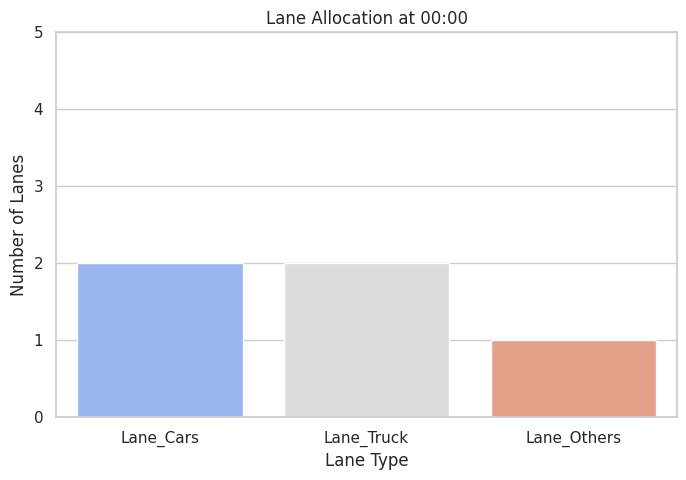

🕒 Checking 01:00 → Vehicles: 0

🕒 Simulated Hour: 01:00
🕒 Checking 01:00 → Vehicles: 0
🚦 Peak Hour? No
Updated Lane Configuration: {'Lane_Cars': 2, 'Lane_Truck': 2, 'Lane_Others': 1}


<ipython-input-33-f94b4d482054>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(lane_config.keys()), y=list(lane_config.values()), palette="coolwarm")


<Figure size 800x600 with 0 Axes>

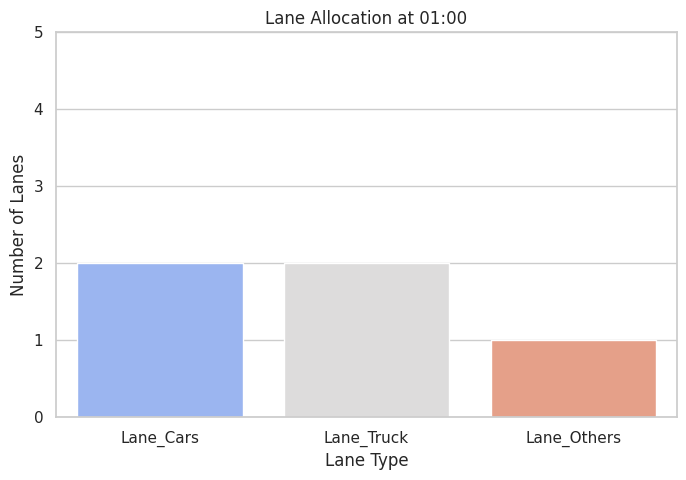

🕒 Checking 02:00 → Vehicles: 0

🕒 Simulated Hour: 02:00
🕒 Checking 02:00 → Vehicles: 0
🚦 Peak Hour? No
Updated Lane Configuration: {'Lane_Cars': 2, 'Lane_Truck': 2, 'Lane_Others': 1}


<ipython-input-33-f94b4d482054>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(lane_config.keys()), y=list(lane_config.values()), palette="coolwarm")


<Figure size 800x600 with 0 Axes>

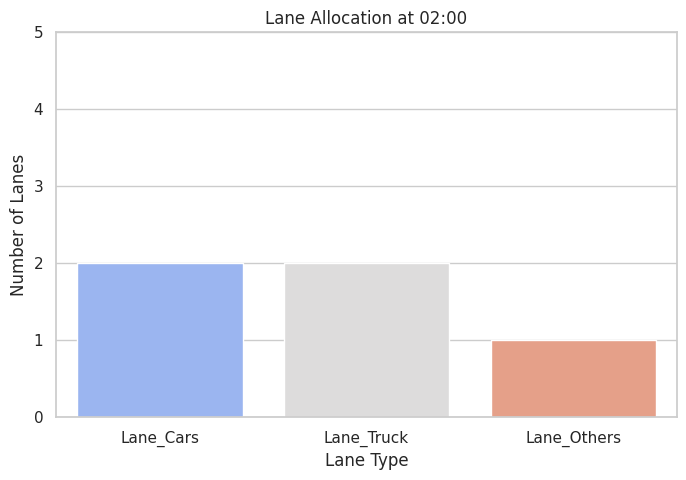

🕒 Checking 03:00 → Vehicles: 0

🕒 Simulated Hour: 03:00
🕒 Checking 03:00 → Vehicles: 0
🚦 Peak Hour? No
Updated Lane Configuration: {'Lane_Cars': 2, 'Lane_Truck': 2, 'Lane_Others': 1}


<ipython-input-33-f94b4d482054>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(lane_config.keys()), y=list(lane_config.values()), palette="coolwarm")


<Figure size 800x600 with 0 Axes>

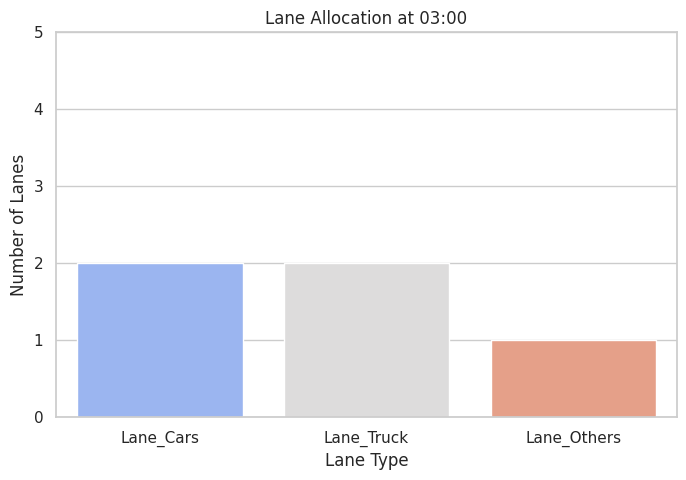

🕒 Checking 04:00 → Vehicles: 0

🕒 Simulated Hour: 04:00
🕒 Checking 04:00 → Vehicles: 0
🚦 Peak Hour? No
Updated Lane Configuration: {'Lane_Cars': 2, 'Lane_Truck': 2, 'Lane_Others': 1}


<ipython-input-33-f94b4d482054>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(lane_config.keys()), y=list(lane_config.values()), palette="coolwarm")


<Figure size 800x600 with 0 Axes>

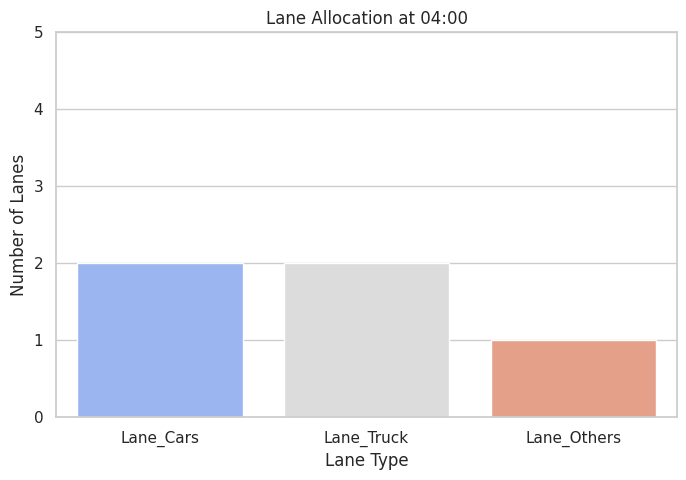

🕒 Checking 05:00 → Vehicles: 0

🕒 Simulated Hour: 05:00
🕒 Checking 05:00 → Vehicles: 0
🚦 Peak Hour? No
Updated Lane Configuration: {'Lane_Cars': 2, 'Lane_Truck': 2, 'Lane_Others': 1}


<ipython-input-33-f94b4d482054>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(lane_config.keys()), y=list(lane_config.values()), palette="coolwarm")


<Figure size 800x600 with 0 Axes>

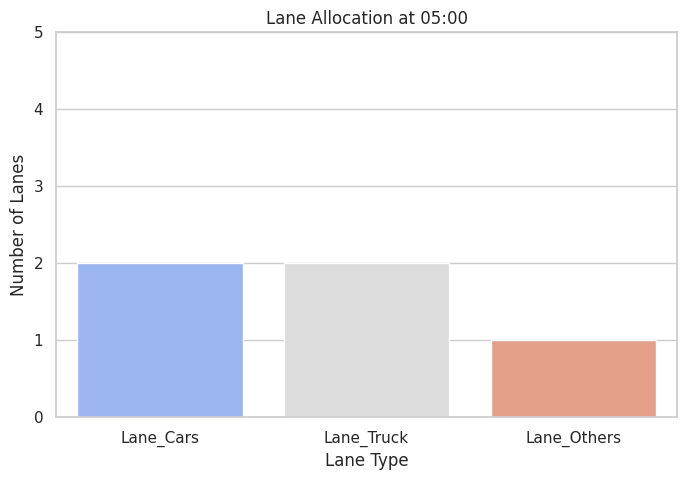

🕒 Checking 06:00 → Vehicles: 0

🕒 Simulated Hour: 06:00
🕒 Checking 06:00 → Vehicles: 0
🚦 Peak Hour? No
Updated Lane Configuration: {'Lane_Cars': 2, 'Lane_Truck': 2, 'Lane_Others': 1}


<ipython-input-33-f94b4d482054>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(lane_config.keys()), y=list(lane_config.values()), palette="coolwarm")


<Figure size 800x600 with 0 Axes>

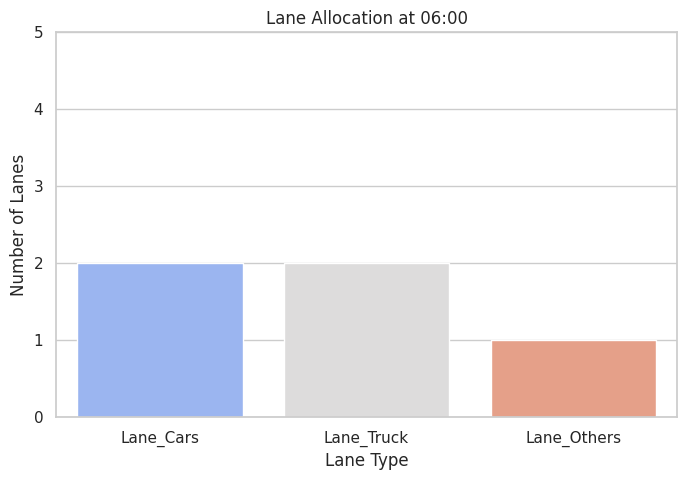

🕒 Checking 07:00 → Vehicles: 0

🕒 Simulated Hour: 07:00
🕒 Checking 07:00 → Vehicles: 0
🚦 Peak Hour? No
Updated Lane Configuration: {'Lane_Cars': 2, 'Lane_Truck': 2, 'Lane_Others': 1}


<ipython-input-33-f94b4d482054>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(lane_config.keys()), y=list(lane_config.values()), palette="coolwarm")


<Figure size 800x600 with 0 Axes>

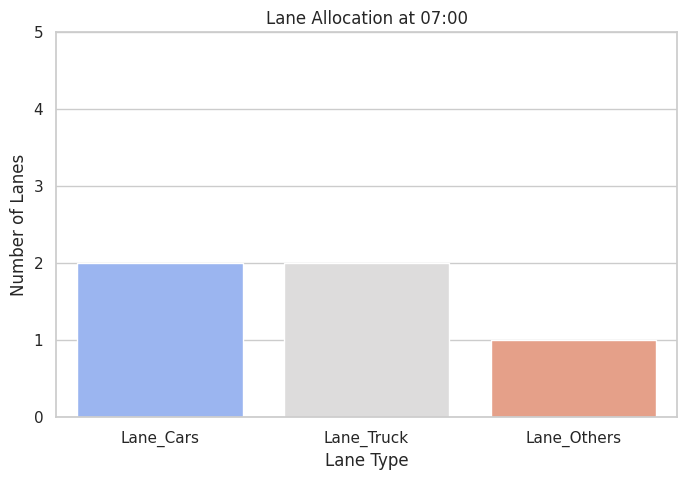

🕒 Checking 08:00 → Vehicles: 0

🕒 Simulated Hour: 08:00
🕒 Checking 08:00 → Vehicles: 0
🚦 Peak Hour? No
Updated Lane Configuration: {'Lane_Cars': 2, 'Lane_Truck': 2, 'Lane_Others': 1}


<ipython-input-33-f94b4d482054>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(lane_config.keys()), y=list(lane_config.values()), palette="coolwarm")


<Figure size 800x600 with 0 Axes>

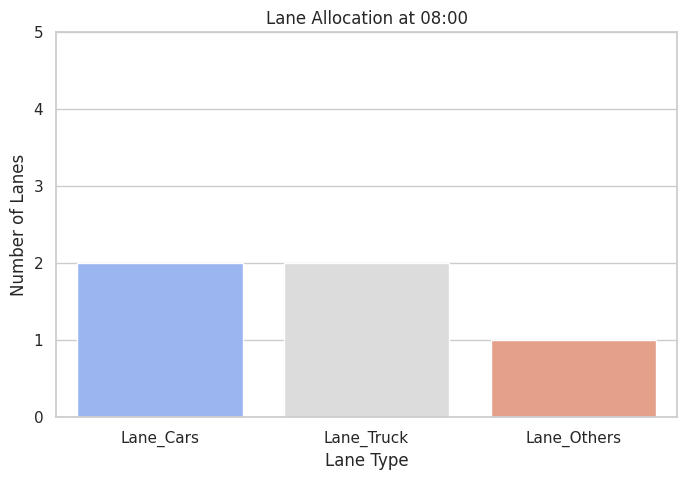

🕒 Checking 09:00 → Vehicles: 0

🕒 Simulated Hour: 09:00
🕒 Checking 09:00 → Vehicles: 0
🚦 Peak Hour? No
Updated Lane Configuration: {'Lane_Cars': 2, 'Lane_Truck': 2, 'Lane_Others': 1}


<ipython-input-33-f94b4d482054>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(lane_config.keys()), y=list(lane_config.values()), palette="coolwarm")


<Figure size 800x600 with 0 Axes>

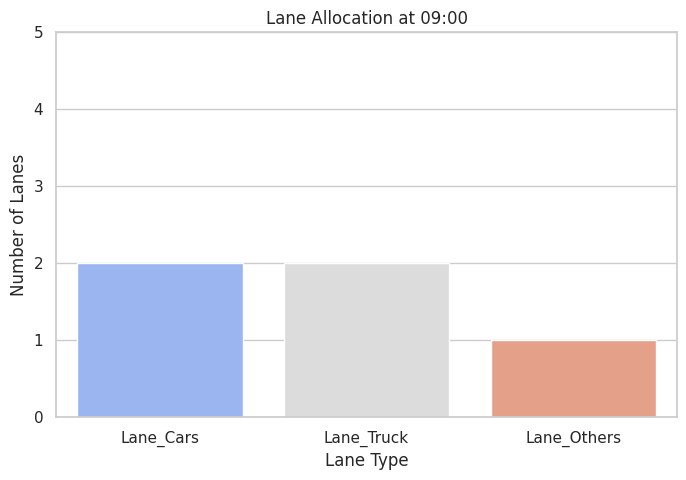

🕒 Checking 10:00 → Vehicles: 0

🕒 Simulated Hour: 10:00
🕒 Checking 10:00 → Vehicles: 0
🚦 Peak Hour? No
Updated Lane Configuration: {'Lane_Cars': 2, 'Lane_Truck': 2, 'Lane_Others': 1}


<ipython-input-33-f94b4d482054>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(lane_config.keys()), y=list(lane_config.values()), palette="coolwarm")


<Figure size 800x600 with 0 Axes>

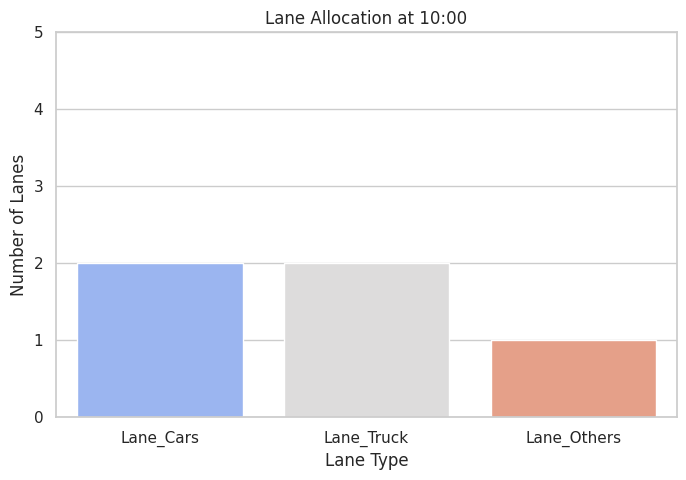

🕒 Checking 11:00 → Vehicles: 0

🕒 Simulated Hour: 11:00
🕒 Checking 11:00 → Vehicles: 0
🚦 Peak Hour? No
Updated Lane Configuration: {'Lane_Cars': 2, 'Lane_Truck': 2, 'Lane_Others': 1}


<ipython-input-33-f94b4d482054>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(lane_config.keys()), y=list(lane_config.values()), palette="coolwarm")


<Figure size 800x600 with 0 Axes>

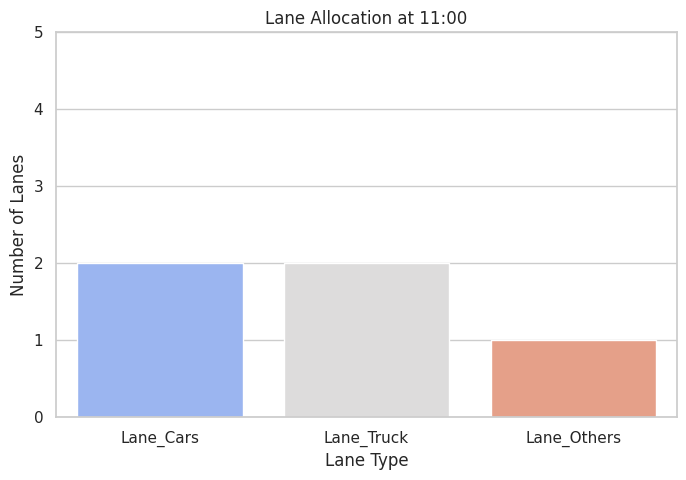

🕒 Checking 12:00 → Vehicles: 0

🕒 Simulated Hour: 12:00
🕒 Checking 12:00 → Vehicles: 0
🚦 Peak Hour? No
Updated Lane Configuration: {'Lane_Cars': 2, 'Lane_Truck': 2, 'Lane_Others': 1}


<ipython-input-33-f94b4d482054>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(lane_config.keys()), y=list(lane_config.values()), palette="coolwarm")


<Figure size 800x600 with 0 Axes>

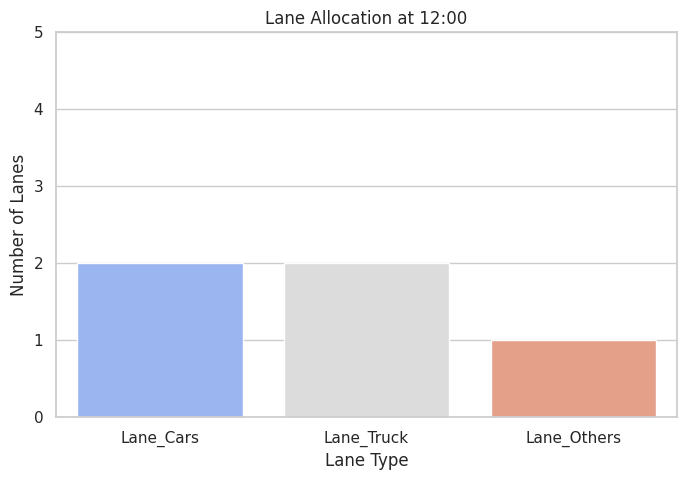

🕒 Checking 13:00 → Vehicles: 0

🕒 Simulated Hour: 13:00
🕒 Checking 13:00 → Vehicles: 0
🚦 Peak Hour? No
Updated Lane Configuration: {'Lane_Cars': 2, 'Lane_Truck': 2, 'Lane_Others': 1}


<ipython-input-33-f94b4d482054>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(lane_config.keys()), y=list(lane_config.values()), palette="coolwarm")


<Figure size 800x600 with 0 Axes>

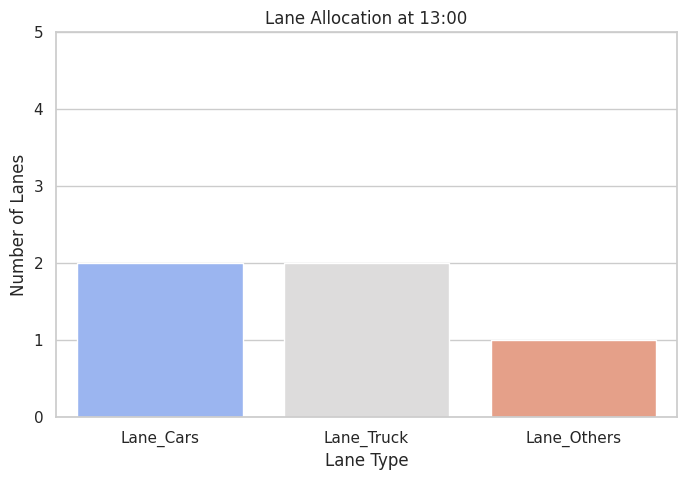

🕒 Checking 14:00 → Vehicles: 0

🕒 Simulated Hour: 14:00
🕒 Checking 14:00 → Vehicles: 0
🚦 Peak Hour? No
Updated Lane Configuration: {'Lane_Cars': 2, 'Lane_Truck': 2, 'Lane_Others': 1}


<ipython-input-33-f94b4d482054>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(lane_config.keys()), y=list(lane_config.values()), palette="coolwarm")


<Figure size 800x600 with 0 Axes>

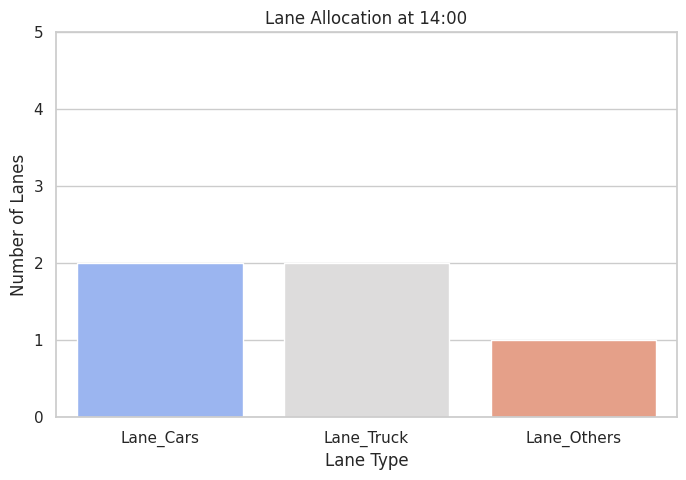

🕒 Checking 15:00 → Vehicles: 0

🕒 Simulated Hour: 15:00
🕒 Checking 15:00 → Vehicles: 0
🚦 Peak Hour? No
Updated Lane Configuration: {'Lane_Cars': 2, 'Lane_Truck': 2, 'Lane_Others': 1}


<ipython-input-33-f94b4d482054>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(lane_config.keys()), y=list(lane_config.values()), palette="coolwarm")


<Figure size 800x600 with 0 Axes>

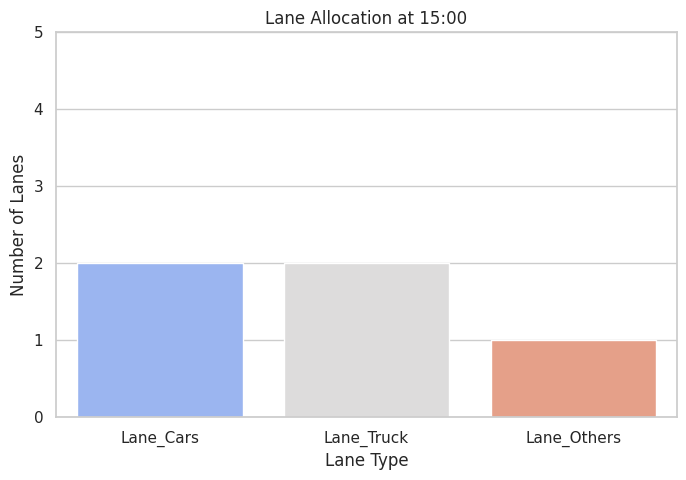

🕒 Checking 16:00 → Vehicles: 0

🕒 Simulated Hour: 16:00
🕒 Checking 16:00 → Vehicles: 0
🚦 Peak Hour? No
Updated Lane Configuration: {'Lane_Cars': 2, 'Lane_Truck': 2, 'Lane_Others': 1}


<ipython-input-33-f94b4d482054>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(lane_config.keys()), y=list(lane_config.values()), palette="coolwarm")


<Figure size 800x600 with 0 Axes>

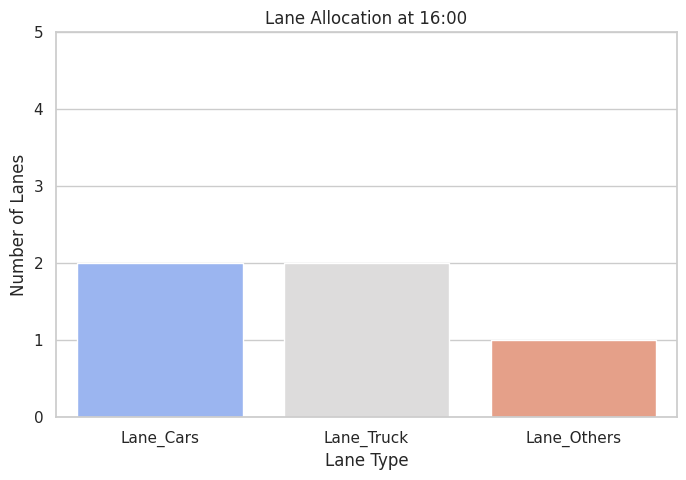

🕒 Checking 17:00 → Vehicles: 0

🕒 Simulated Hour: 17:00
🕒 Checking 17:00 → Vehicles: 0
🚦 Peak Hour? No
Updated Lane Configuration: {'Lane_Cars': 2, 'Lane_Truck': 2, 'Lane_Others': 1}


<ipython-input-33-f94b4d482054>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(lane_config.keys()), y=list(lane_config.values()), palette="coolwarm")


<Figure size 800x600 with 0 Axes>

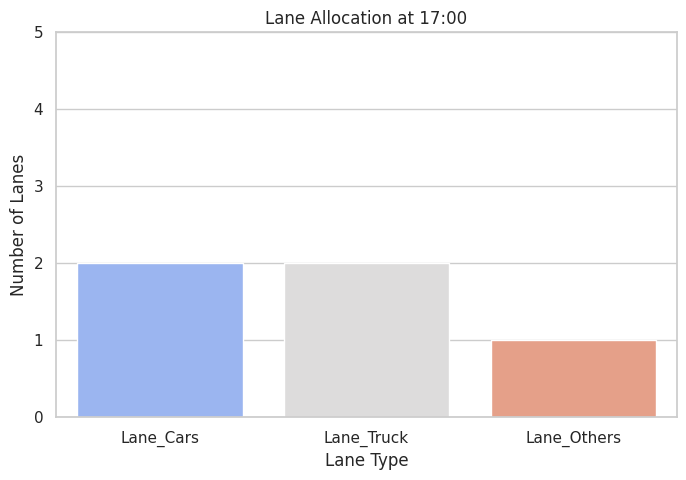

🕒 Checking 18:00 → Vehicles: 0

🕒 Simulated Hour: 18:00
🕒 Checking 18:00 → Vehicles: 0
🚦 Peak Hour? No
Updated Lane Configuration: {'Lane_Cars': 2, 'Lane_Truck': 2, 'Lane_Others': 1}


<ipython-input-33-f94b4d482054>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(lane_config.keys()), y=list(lane_config.values()), palette="coolwarm")


<Figure size 800x600 with 0 Axes>

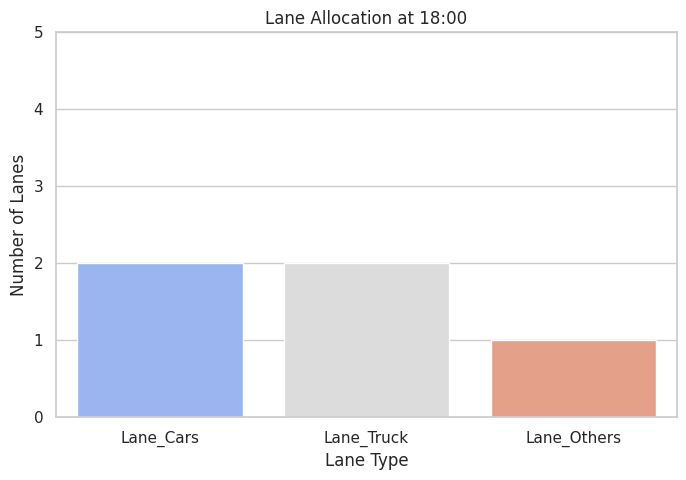

🕒 Checking 19:00 → Vehicles: 0

🕒 Simulated Hour: 19:00
🕒 Checking 19:00 → Vehicles: 0
🚦 Peak Hour? No
Updated Lane Configuration: {'Lane_Cars': 2, 'Lane_Truck': 2, 'Lane_Others': 1}


<ipython-input-33-f94b4d482054>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(lane_config.keys()), y=list(lane_config.values()), palette="coolwarm")


<Figure size 800x600 with 0 Axes>

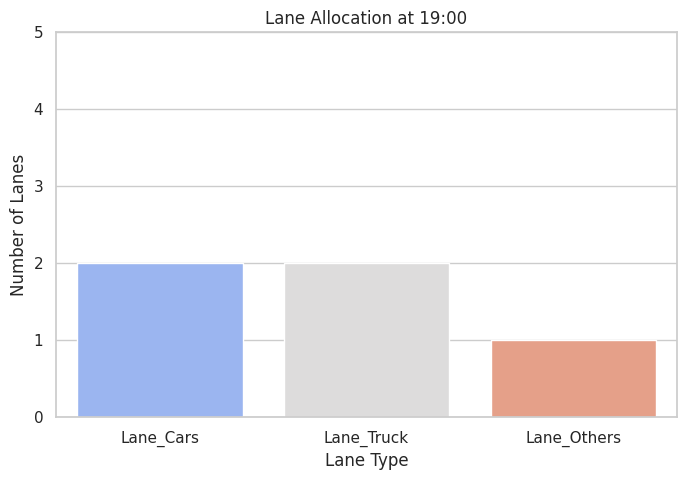

🕒 Checking 20:00 → Vehicles: 0

🕒 Simulated Hour: 20:00
🕒 Checking 20:00 → Vehicles: 0
🚦 Peak Hour? No
Updated Lane Configuration: {'Lane_Cars': 2, 'Lane_Truck': 2, 'Lane_Others': 1}


<ipython-input-33-f94b4d482054>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(lane_config.keys()), y=list(lane_config.values()), palette="coolwarm")


<Figure size 800x600 with 0 Axes>

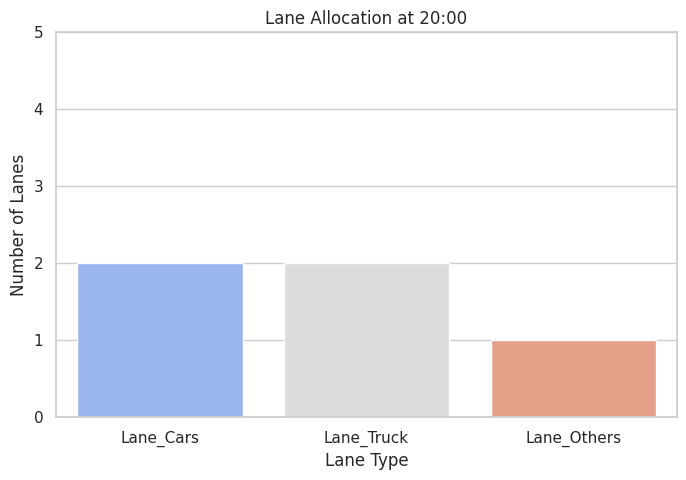

🕒 Checking 21:00 → Vehicles: 0

🕒 Simulated Hour: 21:00
🕒 Checking 21:00 → Vehicles: 0
🚦 Peak Hour? No
Updated Lane Configuration: {'Lane_Cars': 2, 'Lane_Truck': 2, 'Lane_Others': 1}


<ipython-input-33-f94b4d482054>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(lane_config.keys()), y=list(lane_config.values()), palette="coolwarm")


<Figure size 800x600 with 0 Axes>

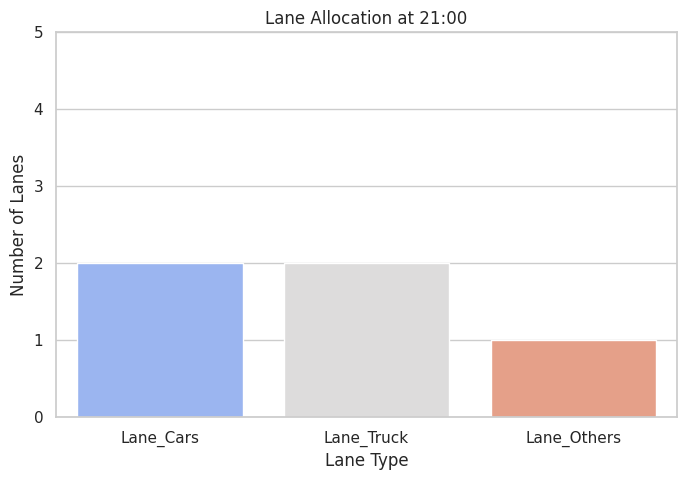

🕒 Checking 22:00 → Vehicles: 0

🕒 Simulated Hour: 22:00
🕒 Checking 22:00 → Vehicles: 0
🚦 Peak Hour? No
Updated Lane Configuration: {'Lane_Cars': 2, 'Lane_Truck': 2, 'Lane_Others': 1}


<ipython-input-33-f94b4d482054>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(lane_config.keys()), y=list(lane_config.values()), palette="coolwarm")


<Figure size 800x600 with 0 Axes>

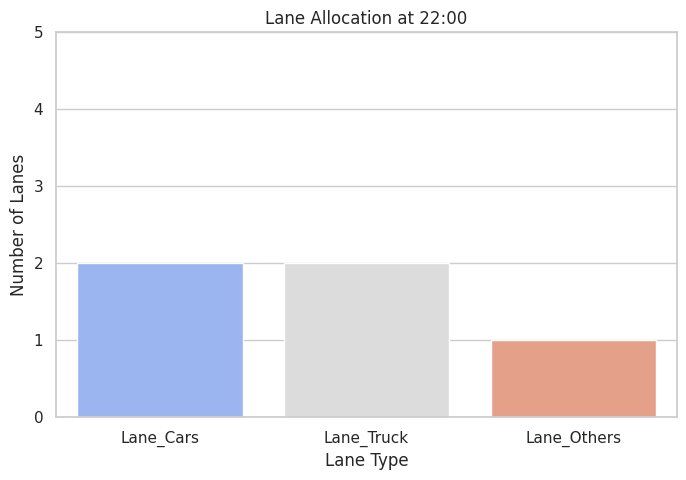

🕒 Checking 23:00 → Vehicles: 0

🕒 Simulated Hour: 23:00
🕒 Checking 23:00 → Vehicles: 0
🚦 Peak Hour? No
Updated Lane Configuration: {'Lane_Cars': 2, 'Lane_Truck': 2, 'Lane_Others': 1}


<ipython-input-33-f94b4d482054>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(lane_config.keys()), y=list(lane_config.values()), palette="coolwarm")


<Figure size 800x600 with 0 Axes>

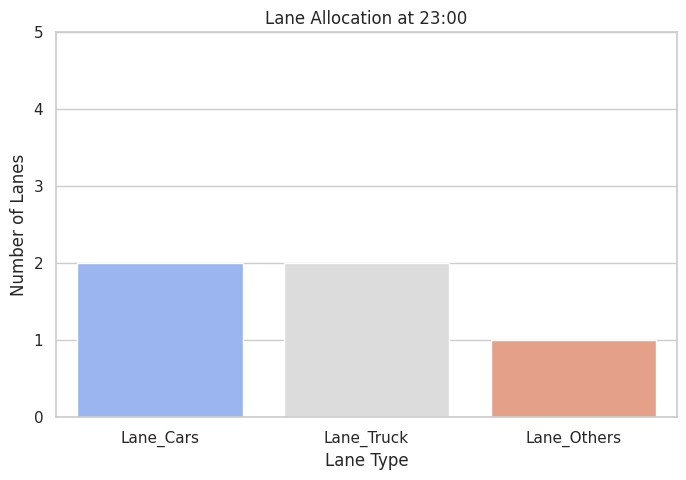

<Figure size 800x600 with 0 Axes>

In [33]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import random
import time

# 2. Extract hour

# 3. Define lane allocation thresholds
CAR_LANE_THRESHOLD = 50  # If a car lane has more than this, add a new lane
TOTAL_VEHICLE_PEAK_THRESHOLD = 1750  # Peak hour threshold
DEFAULT_LANE_CONFIG = {"Lane_Cars": 2, "Lane_Truck": 2, "Lane_Others": 1}

# Function to check if the current time is peak hour
def check_if_peak_hour(simulated_hour):
    hour_traffic = df[df["hour"] == simulated_hour]
    total_vehicles = len(hour_traffic)

    print(f"🕒 Checking {simulated_hour}:00 → Vehicles: {total_vehicles}")

    return total_vehicles > TOTAL_VEHICLE_PEAK_THRESHOLD  # Returns True if it's peak hour

# Function to reallocate a lane for cars
def reallocate_lane_to_cars():
    return {"Lane_Cars": 3, "Lane_Truck": 1, "Lane_Others": 1}  # More lanes for cars

# Function to dynamically adjust lanes
def adjust_lanes_peak_hours(simulated_hour, vehicle_counts):
    is_peak_hour = check_if_peak_hour(simulated_hour)

    if is_peak_hour and vehicle_counts["Lane_Cars"] > CAR_LANE_THRESHOLD:
        return reallocate_lane_to_cars()  # Adjust lanes dynamically
    return DEFAULT_LANE_CONFIG

# Visualization function
def plot_lane_allocation(lane_config, simulated_hour):
    plt.figure(figsize=(8, 5))
    sns.barplot(x=list(lane_config.keys()), y=list(lane_config.values()), palette="coolwarm")
    plt.ylim(0, 5)
    plt.xlabel("Lane Type")
    plt.ylabel("Number of Lanes")
    plt.title(f"Lane Allocation at {simulated_hour}:00")
    plt.show(block=False)
    plt.pause(2)  # Pause for visualization
    plt.clf()

# Simulating for every hour from 12 AM to 11 PM
simulated_hours = [str(hour).zfill(2) for hour in range(0, 24)]  # Ensures proper matching

for simulated_hour in simulated_hours:
    vehicle_counts = {
        "Lane_Cars": random.randint(30, 70),  # Randomized to simulate live data
        "Lane_Truck": random.randint(10, 40),
        "Lane_Others": random.randint(5, 20)
    }

    new_lane_config = adjust_lanes_peak_hours(simulated_hour, vehicle_counts)

    print(f"\n🕒 Simulated Hour: {simulated_hour}:00")
    print(f"🚦 Peak Hour? {'Yes' if check_if_peak_hour(simulated_hour) else 'No'}")
    print("Updated Lane Configuration:", new_lane_config)

    plot_lane_allocation(new_lane_config, simulated_hour)
    time.sleep(2)  # Shorter delay for smoother execution


<ipython-input-26-04ae5722d385>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='hour', data=df, palette='viridis')


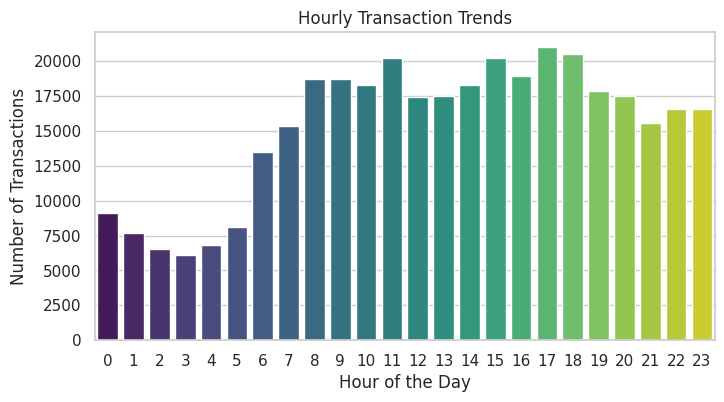

<ipython-input-26-04ae5722d385>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_merchants.values, y=top_merchants.index, palette='coolwarm')


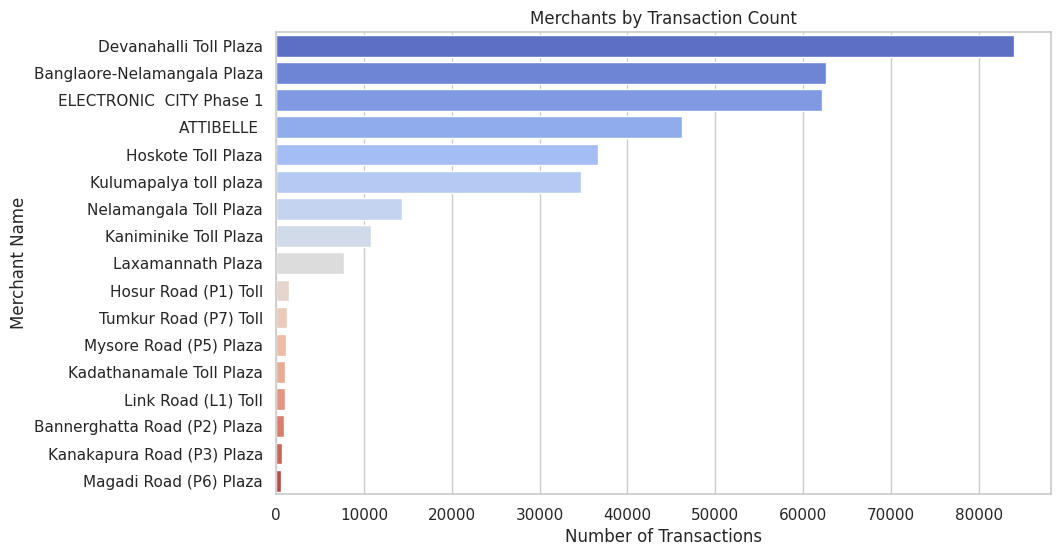

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (8,6)

# Preprocessing (basic)
df['merchant_sub_type'] = df['merchant_sub_type'].str.strip().str.capitalize()
df['city'] = df['city'].str.strip().str.title()
df[['latitude', 'longitude']] = df['geocode'].str.split(',', expand=True)
df['latitude'] = pd.to_numeric(df['latitude'], errors='coerce')
df['longitude'] = pd.to_numeric(df['longitude'], errors='coerce')
df['hour'] = pd.to_datetime(df['initiated_time'], format='%d-%m-%Y %H:%M', errors='coerce').dt.hour


# 2. Hourly Transaction Trends
plt.figure(figsize=(8, 4))
sns.countplot(x='hour', data=df, palette='viridis')
plt.title('Hourly Transaction Trends')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Transactions')
plt.show()



# 4. Transactions per Merchant
top_merchants = df['merchant_name'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=top_merchants.values, y=top_merchants.index, palette='coolwarm')
plt.title('Merchants by Transaction Count')
plt.xlabel('Number of Transactions')
plt.ylabel('Merchant Name')
plt.show()

In [27]:
df_hoskote = df[(df['merchant_name']== 'Hoskote Toll Plaza')]

In [28]:
df_hoskote.head()

,SlNo.,merchant_name,direction,lane,tag_id,vehicle_regn_number,txn_amount,initiated_time,inn_rr_time_sec,vehicle_class_code,vehicle_comvehicle,geocode,merchant_sub_type,city,state,hour,minute,latitude,longitude
241357,241358,Hoskote Toll Plaza,N,Lane1,EJBIV,YVMZG,10,1900-01-01 18:31:00,274,VC4,F,"13.059436,77.770734",National,Bangalore Rural,Karnataka,18,31,13.059436,77.770734
241358,241359,Hoskote Toll Plaza,N,Lane1,BDXMU,JYRGR,10,1900-01-01 16:43:00,301,VC20,T,"13.059436,77.770734",National,Bangalore Rural,Karnataka,16,43,13.059436,77.770734
241359,241360,Hoskote Toll Plaza,N,Lane4,EGYVP,JKGEO,10,1900-01-01 22:36:00,251,VC4,F,"13.059436,77.770734",National,Bangalore Rural,Karnataka,22,36,13.059436,77.770734
241360,241361,Hoskote Toll Plaza,S,Lane7,PAJUF,HLSZP,10,1900-01-01 17:25:00,306,VC4,F,"13.059436,77.770734",National,Bangalore Rural,Karnataka,17,25,13.059436,77.770734
241362,241363,Hoskote Toll Plaza,N,Lane2,CSYYI,BWOGH,25,1900-01-01 11:58:00,244,VC4,F,"13.059436,77.770734",National,Bangalore Rural,Karnataka,11,58,13.059436,77.770734


In [29]:
df_hoskote['lane'].unique()

array(['Lane1', 'Lane4', 'Lane7', 'Lane2', 'Lane5', 'L1', 'Lane11',
       'Lane9', 'Lane12', 'Lane10', 'Lane3', 'Lane6', 'Lane8', 'Lane13'],
      dtype=object)

<ipython-input-30-abab6a7ce801>:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(unique_directions))
<ipython-input-30-abab6a7ce801>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='hour', data=df_hoskote, palette='viridis')


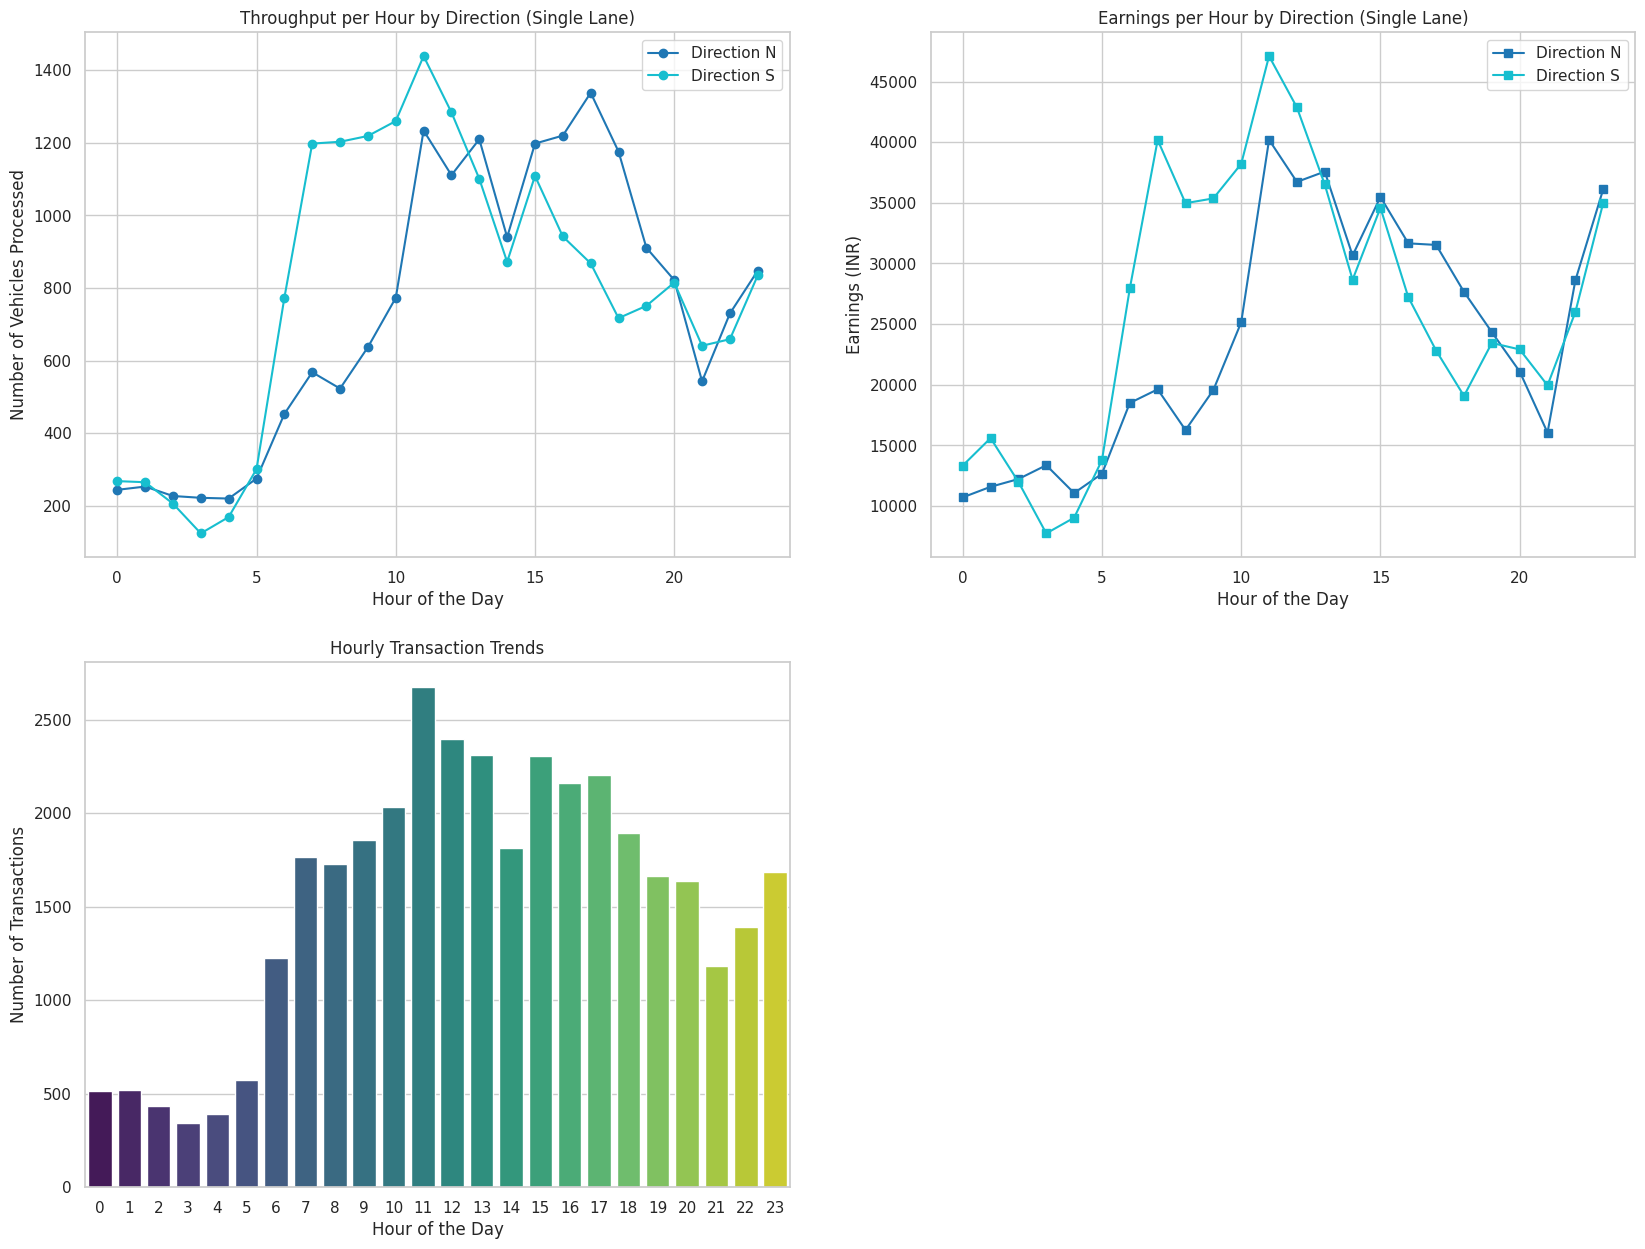

<Figure size 800x600 with 0 Axes>

In [30]:
throughput_per_hour_direction = df_hoskote.groupby(['hour', 'direction']).size().reset_index(name='throughput')
earnings_per_hour_direction = df_hoskote.groupby(['hour', 'direction'])['txn_amount'].sum().reset_index(name='earnings')

# 3. Merge throughput and earnings data
hourly_metrics_direction = pd.merge(throughput_per_hour_direction, earnings_per_hour_direction, on=['hour', 'direction'])

# 4. Visualization
unique_directions = hourly_metrics_direction['direction'].unique()
colors = plt.cm.get_cmap('tab10', len(unique_directions))

plt.figure(figsize=(20, 15))


# Throughput per hour by direction
plt.subplot(2, 2, 1)
for i, direction in enumerate(unique_directions):
    data = hourly_metrics_direction[hourly_metrics_direction['direction'] == direction]
    plt.plot(data['hour'], data['throughput'], marker='o', label=f'Direction {direction}', color=colors(i))
plt.title('Throughput per Hour by Direction (Single Lane)')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Vehicles Processed')
plt.legend()

# Earnings per hour by direction
plt.subplot(2, 2, 2)
for i, direction in enumerate(unique_directions):
    data = hourly_metrics_direction[hourly_metrics_direction['direction'] == direction]
    plt.plot(data['hour'], data['earnings'], marker='s', label=f'Direction {direction}', color=colors(i))
plt.title('Earnings per Hour by Direction (Single Lane)')
plt.xlabel('Hour of the Day')
plt.ylabel('Earnings (INR)')
plt.legend()

plt.subplot(2,2,3)
sns.countplot(x='hour', data=df_hoskote, palette='viridis')
plt.title('Hourly Transaction Trends')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Transactions')
plt.show()
plt.tight_layout()
plt.show()

# Display summary
# print(hourly_metrics_direction)



<ipython-input-31-417e75538390>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='hour', data=df_hoskote, palette='viridis')


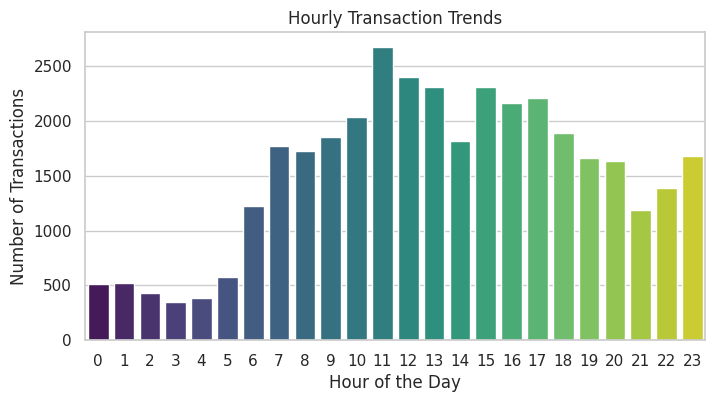

In [31]:
plt.figure(figsize=(8, 4))
sns.countplot(x='hour', data=df_hoskote, palette='viridis')
plt.title('Hourly Transaction Trends')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Transactions')
plt.show()

Unique Lanes in Hoskote Toll Plaza: ['Lane1' 'Lane4' 'Lane7' 'Lane2' 'Lane5' 'L1' 'Lane11' 'Lane9' 'Lane12'
 'Lane10' 'Lane3' 'Lane6' 'Lane8' 'Lane13']


<ipython-input-35-54c3d5dda6fa>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hoskote['lane_direction'] = df_hoskote['lane'].apply(lambda x: 'N' if 'N' in x else 'S')


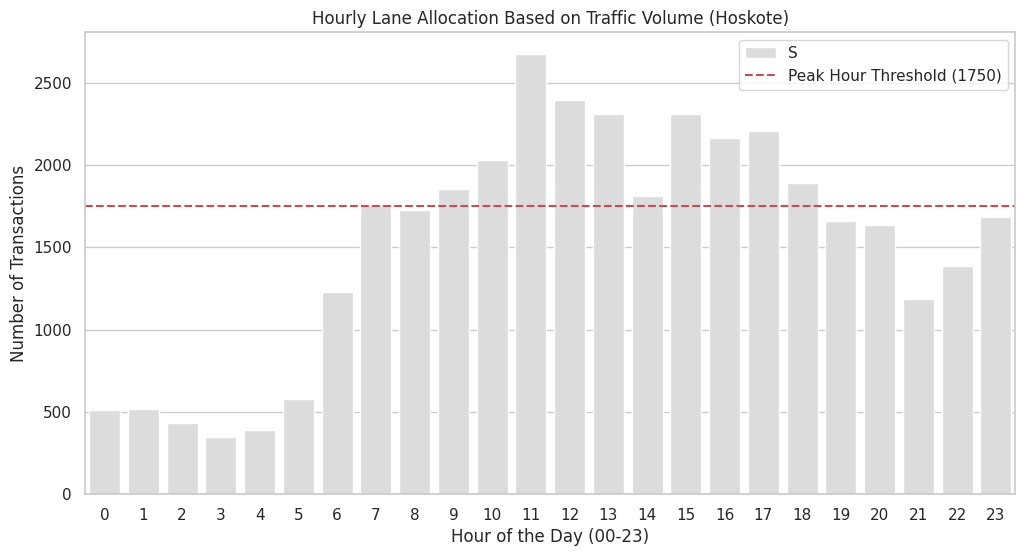

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("Bangalore_1Day_NETC.csv", encoding="utf-8")

# Standardize column names
df.columns = df.columns.str.strip()

# Convert 'initiated_time' to datetime and extract hour
df['initiated_time'] = pd.to_datetime(df['initiated_time'].astype(str).str.replace('00-01-1900', '').str.strip(), format='%H:%M', errors="coerce")
df['hour'] = df['initiated_time'].dt.hour

# Filter for Hoskote Toll Plaza
df_hoskote = df[df['merchant_name'] == 'Hoskote Toll Plaza']

# Identify unique lanes
print("Unique Lanes in Hoskote Toll Plaza:", df_hoskote['lane'].unique())

# **Segregate lanes into North (N) & South (S)**
df_hoskote['lane_direction'] = df_hoskote['lane'].apply(lambda x: 'N' if 'N' in x else 'S')

# Compute throughput per hour per lane direction
throughput_per_hour_lane = df_hoskote.groupby(['hour', 'lane_direction']).size().reset_index(name='throughput')

# Identify peak hours where traffic volume > 1750
throughput_per_hour_lane['peak_hour'] = throughput_per_hour_lane['throughput'] > 1750

# **Plot Hourly Lane Allocation Based on Traffic Volume**
plt.figure(figsize=(12, 6))
sns.barplot(x='hour', y='throughput', hue='lane_direction', data=throughput_per_hour_lane, palette='coolwarm')
plt.axhline(1750, color='r', linestyle='--', label="Peak Hour Threshold (1750)")
plt.title('Hourly Lane Allocation Based on Traffic Volume (Hoskote)')
plt.xlabel('Hour of the Day (00-23)')
plt.ylabel('Number of Transactions')
plt.legend()
plt.show()


<ipython-input-39-ce83f35d7dd2>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hoskote['initiated_time'] = df_hoskote['initiated_time'].astype(str).str.replace('00-01-1900', '').str.strip()
<ipython-input-39-ce83f35d7dd2>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hoskote['initiated_time'] = pd.to_datetime(df_hoskote['initiated_time'], format='%H:%M', errors='coerce')
<ipython-input-39-ce83f35d7dd2>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

🕒 Checking 00:00 → Vehicles: 512

🕒 Simulated Hour: 00:00
🕒 Checking 00:00 → Vehicles: 512
🚦 Peak Hour? No
Updated Lane Configuration: {'Lane_Cars_N': 2, 'Lane_Truck_N': 2, 'Lane_Others_N': 1, 'Lane_Cars_S': 2, 'Lane_Truck_S': 2, 'Lane_Others_S': 1}


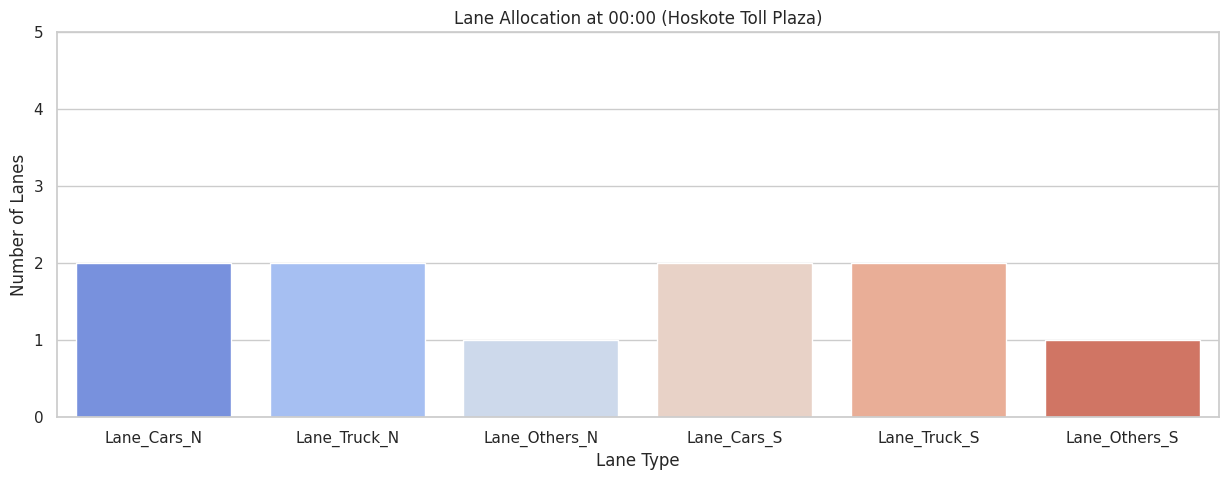

🕒 Checking 01:00 → Vehicles: 518

🕒 Simulated Hour: 01:00
🕒 Checking 01:00 → Vehicles: 518
🚦 Peak Hour? No
Updated Lane Configuration: {'Lane_Cars_N': 2, 'Lane_Truck_N': 2, 'Lane_Others_N': 1, 'Lane_Cars_S': 2, 'Lane_Truck_S': 2, 'Lane_Others_S': 1}


<ipython-input-39-ce83f35d7dd2>:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(lane_config.keys()), y=list(lane_config.values()), palette="coolwarm")


<Figure size 800x600 with 0 Axes>

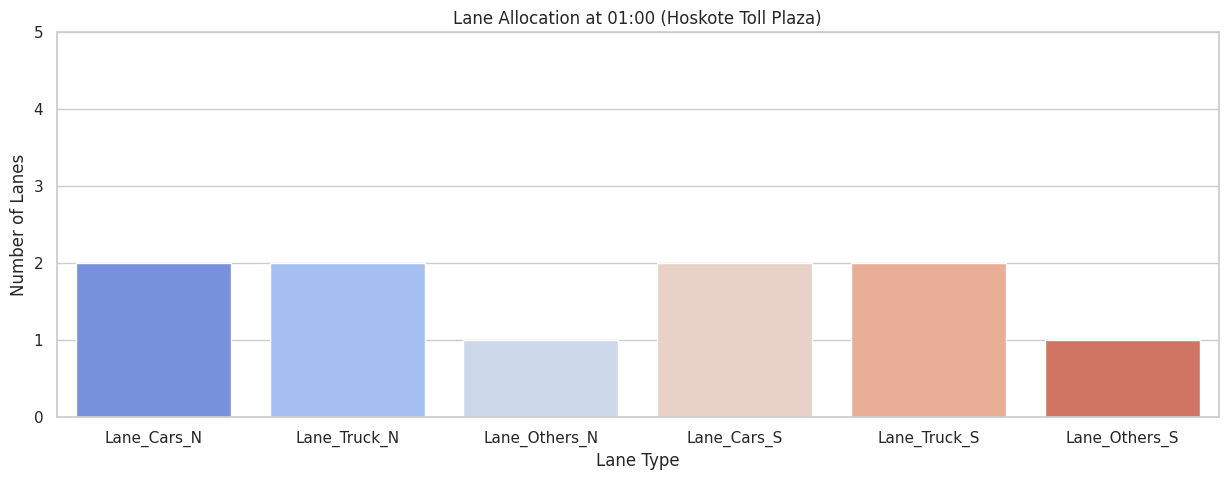

🕒 Checking 02:00 → Vehicles: 433

🕒 Simulated Hour: 02:00
🕒 Checking 02:00 → Vehicles: 433
🚦 Peak Hour? No
Updated Lane Configuration: {'Lane_Cars_N': 2, 'Lane_Truck_N': 2, 'Lane_Others_N': 1, 'Lane_Cars_S': 2, 'Lane_Truck_S': 2, 'Lane_Others_S': 1}


<ipython-input-39-ce83f35d7dd2>:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(lane_config.keys()), y=list(lane_config.values()), palette="coolwarm")


<Figure size 800x600 with 0 Axes>

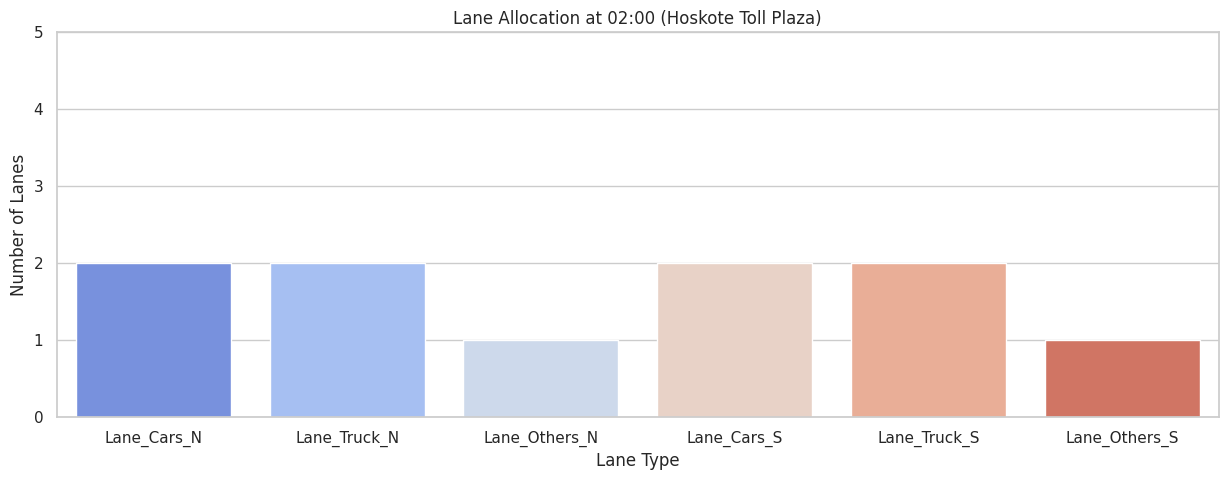

🕒 Checking 03:00 → Vehicles: 346

🕒 Simulated Hour: 03:00
🕒 Checking 03:00 → Vehicles: 346
🚦 Peak Hour? No
Updated Lane Configuration: {'Lane_Cars_N': 2, 'Lane_Truck_N': 2, 'Lane_Others_N': 1, 'Lane_Cars_S': 2, 'Lane_Truck_S': 2, 'Lane_Others_S': 1}


<ipython-input-39-ce83f35d7dd2>:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(lane_config.keys()), y=list(lane_config.values()), palette="coolwarm")


<Figure size 800x600 with 0 Axes>

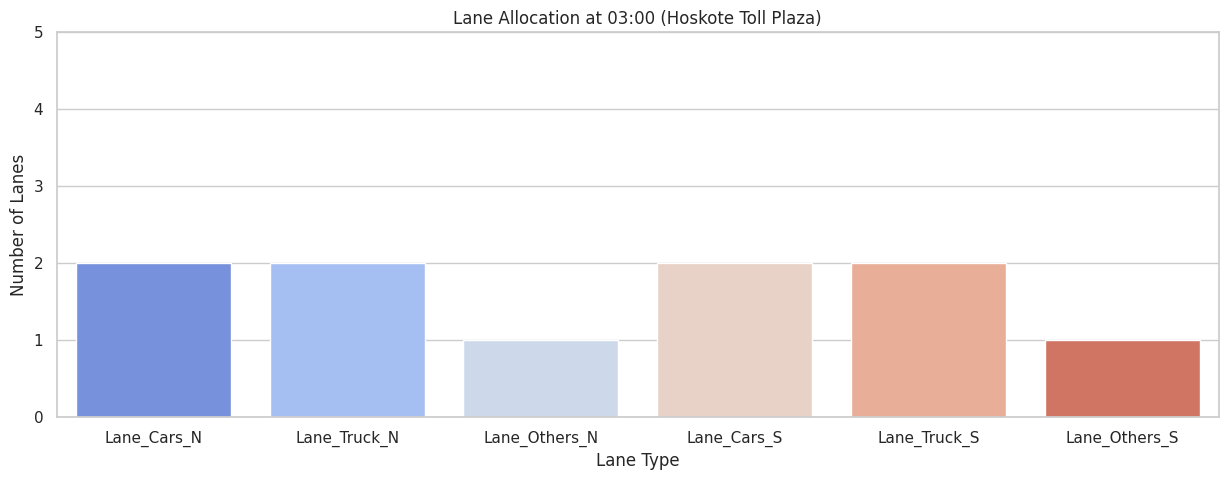

🕒 Checking 04:00 → Vehicles: 389

🕒 Simulated Hour: 04:00
🕒 Checking 04:00 → Vehicles: 389
🚦 Peak Hour? No
Updated Lane Configuration: {'Lane_Cars_N': 2, 'Lane_Truck_N': 2, 'Lane_Others_N': 1, 'Lane_Cars_S': 2, 'Lane_Truck_S': 2, 'Lane_Others_S': 1}


<ipython-input-39-ce83f35d7dd2>:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(lane_config.keys()), y=list(lane_config.values()), palette="coolwarm")


<Figure size 800x600 with 0 Axes>

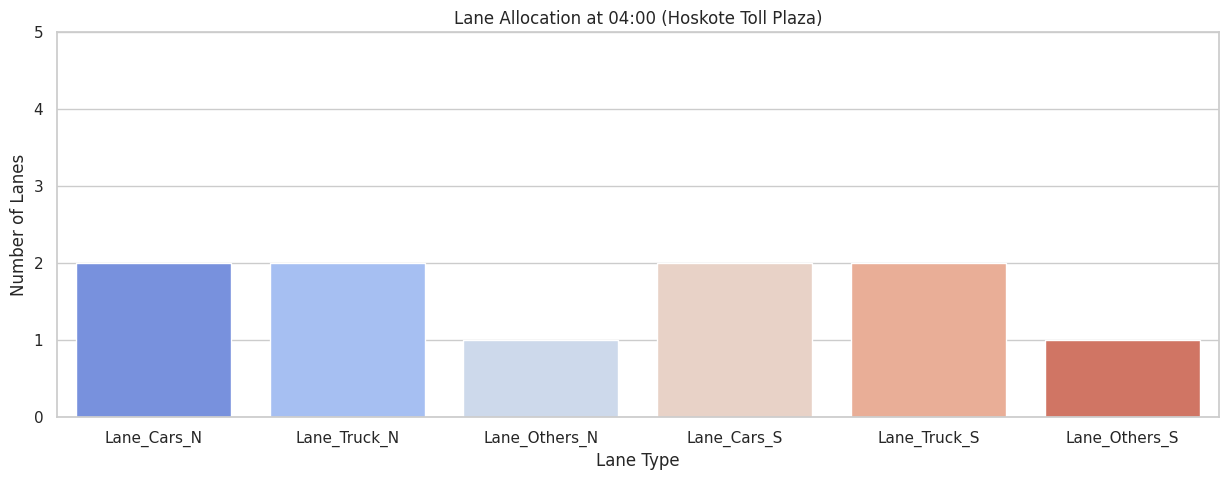

🕒 Checking 05:00 → Vehicles: 576

🕒 Simulated Hour: 05:00
🕒 Checking 05:00 → Vehicles: 576
🚦 Peak Hour? No
Updated Lane Configuration: {'Lane_Cars_N': 2, 'Lane_Truck_N': 2, 'Lane_Others_N': 1, 'Lane_Cars_S': 2, 'Lane_Truck_S': 2, 'Lane_Others_S': 1}


<ipython-input-39-ce83f35d7dd2>:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(lane_config.keys()), y=list(lane_config.values()), palette="coolwarm")


<Figure size 800x600 with 0 Axes>

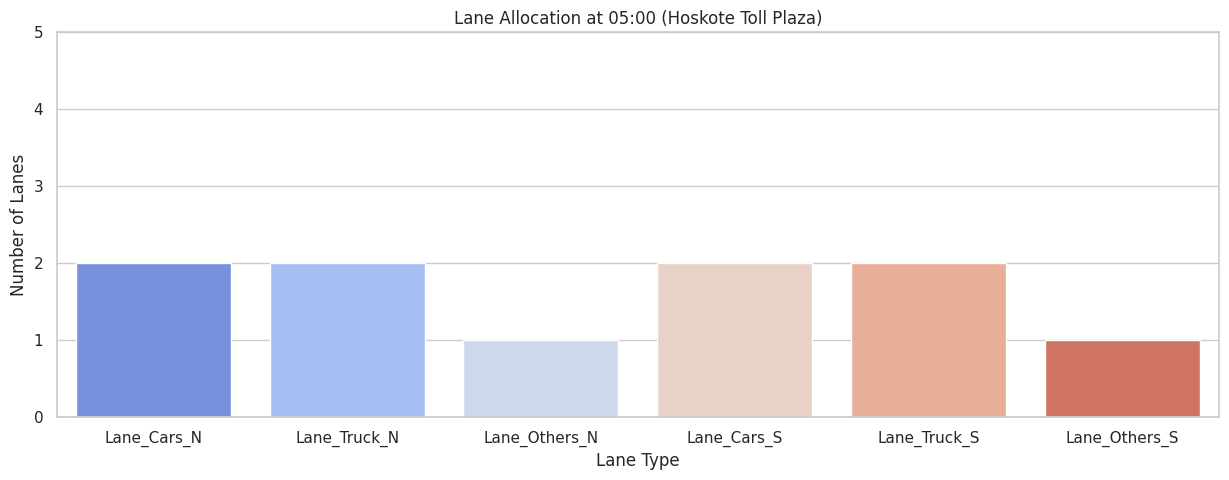

🕒 Checking 06:00 → Vehicles: 1226

🕒 Simulated Hour: 06:00
🕒 Checking 06:00 → Vehicles: 1226
🚦 Peak Hour? No
Updated Lane Configuration: {'Lane_Cars_N': 2, 'Lane_Truck_N': 2, 'Lane_Others_N': 1, 'Lane_Cars_S': 2, 'Lane_Truck_S': 2, 'Lane_Others_S': 1}


<ipython-input-39-ce83f35d7dd2>:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(lane_config.keys()), y=list(lane_config.values()), palette="coolwarm")


<Figure size 800x600 with 0 Axes>

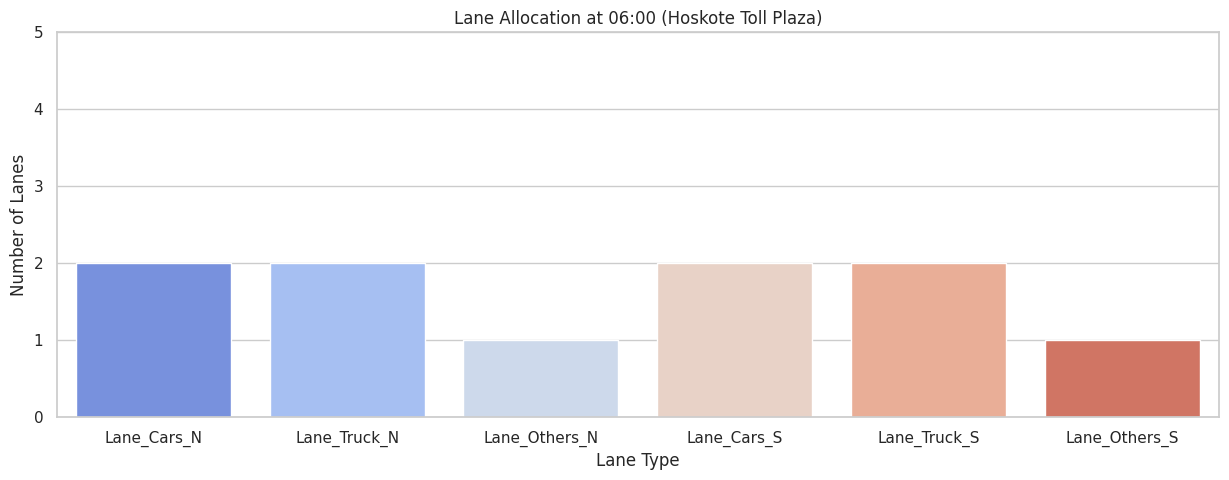

🕒 Checking 07:00 → Vehicles: 1766

🕒 Simulated Hour: 07:00
🕒 Checking 07:00 → Vehicles: 1766
🚦 Peak Hour? Yes
Updated Lane Configuration: {'Lane_Cars_N': 3, 'Lane_Truck_N': 1, 'Lane_Others_N': 1, 'Lane_Cars_S': 3, 'Lane_Truck_S': 1, 'Lane_Others_S': 1}


<ipython-input-39-ce83f35d7dd2>:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(lane_config.keys()), y=list(lane_config.values()), palette="coolwarm")


<Figure size 800x600 with 0 Axes>

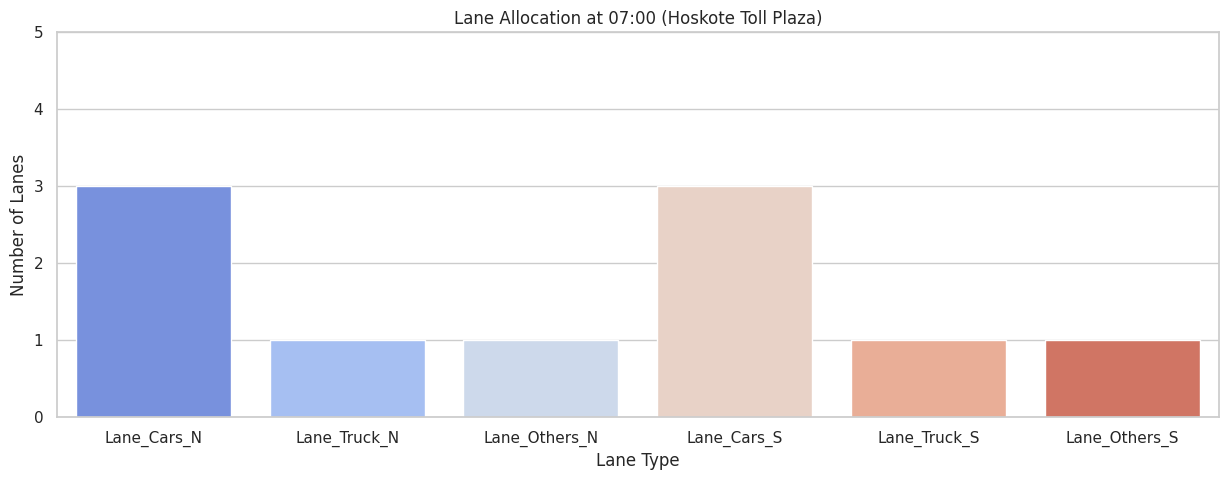

🕒 Checking 08:00 → Vehicles: 1726

🕒 Simulated Hour: 08:00
🕒 Checking 08:00 → Vehicles: 1726
🚦 Peak Hour? No
Updated Lane Configuration: {'Lane_Cars_N': 2, 'Lane_Truck_N': 2, 'Lane_Others_N': 1, 'Lane_Cars_S': 2, 'Lane_Truck_S': 2, 'Lane_Others_S': 1}


<ipython-input-39-ce83f35d7dd2>:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(lane_config.keys()), y=list(lane_config.values()), palette="coolwarm")


<Figure size 800x600 with 0 Axes>

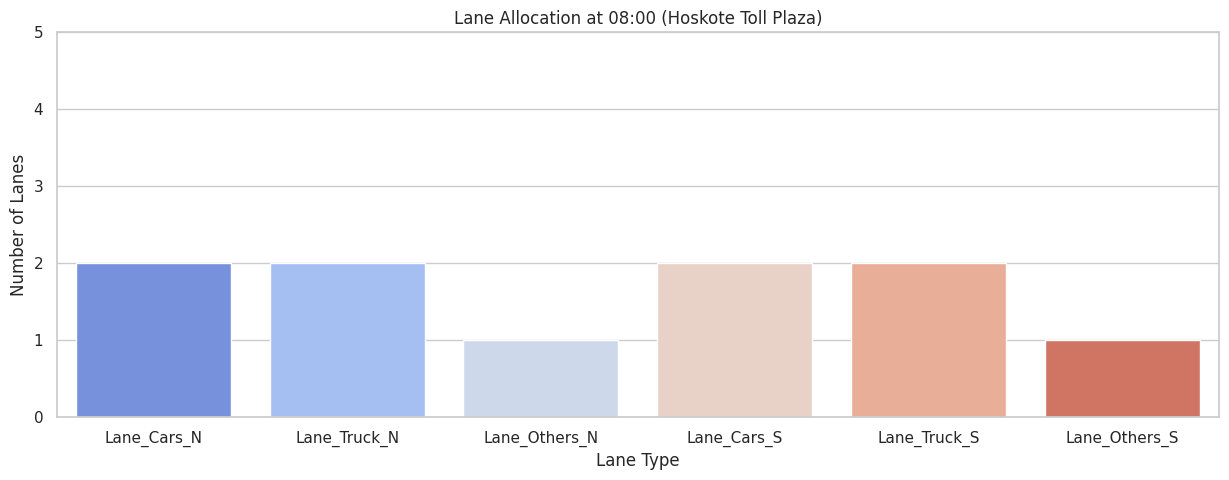

🕒 Checking 09:00 → Vehicles: 1856

🕒 Simulated Hour: 09:00
🕒 Checking 09:00 → Vehicles: 1856
🚦 Peak Hour? Yes
Updated Lane Configuration: {'Lane_Cars_N': 2, 'Lane_Truck_N': 2, 'Lane_Others_N': 1, 'Lane_Cars_S': 2, 'Lane_Truck_S': 2, 'Lane_Others_S': 1}


<ipython-input-39-ce83f35d7dd2>:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(lane_config.keys()), y=list(lane_config.values()), palette="coolwarm")


<Figure size 800x600 with 0 Axes>

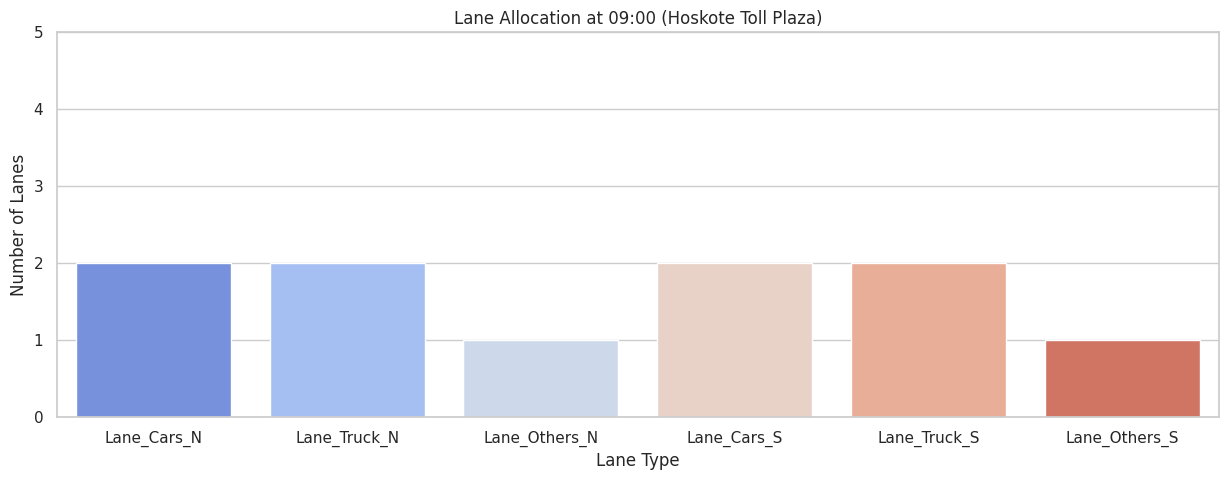

🕒 Checking 10:00 → Vehicles: 2033

🕒 Simulated Hour: 10:00
🕒 Checking 10:00 → Vehicles: 2033
🚦 Peak Hour? Yes
Updated Lane Configuration: {'Lane_Cars_N': 3, 'Lane_Truck_N': 1, 'Lane_Others_N': 1, 'Lane_Cars_S': 3, 'Lane_Truck_S': 1, 'Lane_Others_S': 1}


<ipython-input-39-ce83f35d7dd2>:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(lane_config.keys()), y=list(lane_config.values()), palette="coolwarm")


<Figure size 800x600 with 0 Axes>

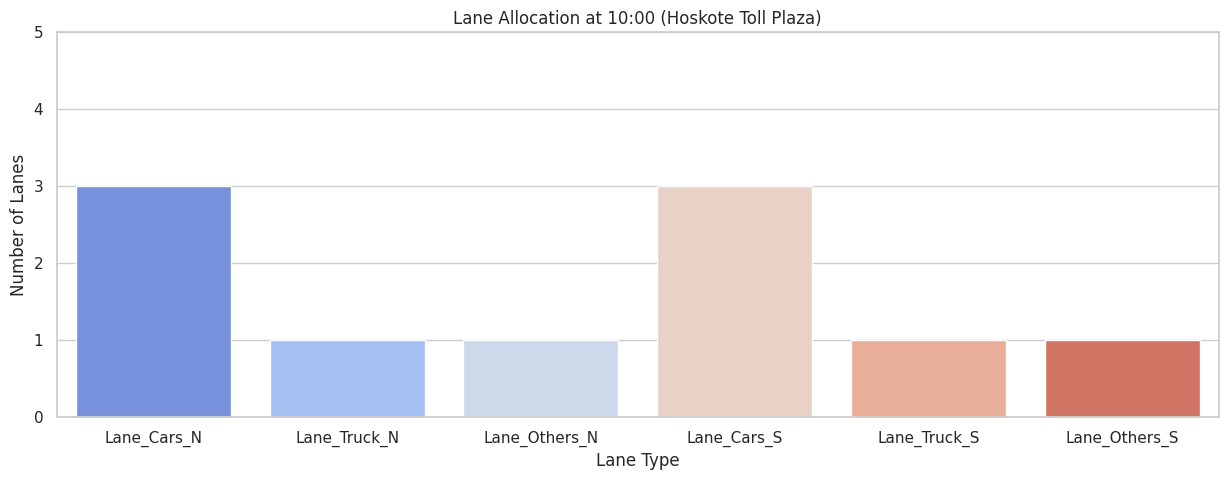

🕒 Checking 11:00 → Vehicles: 2673

🕒 Simulated Hour: 11:00
🕒 Checking 11:00 → Vehicles: 2673
🚦 Peak Hour? Yes
Updated Lane Configuration: {'Lane_Cars_N': 2, 'Lane_Truck_N': 2, 'Lane_Others_N': 1, 'Lane_Cars_S': 2, 'Lane_Truck_S': 2, 'Lane_Others_S': 1}


<ipython-input-39-ce83f35d7dd2>:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(lane_config.keys()), y=list(lane_config.values()), palette="coolwarm")


<Figure size 800x600 with 0 Axes>

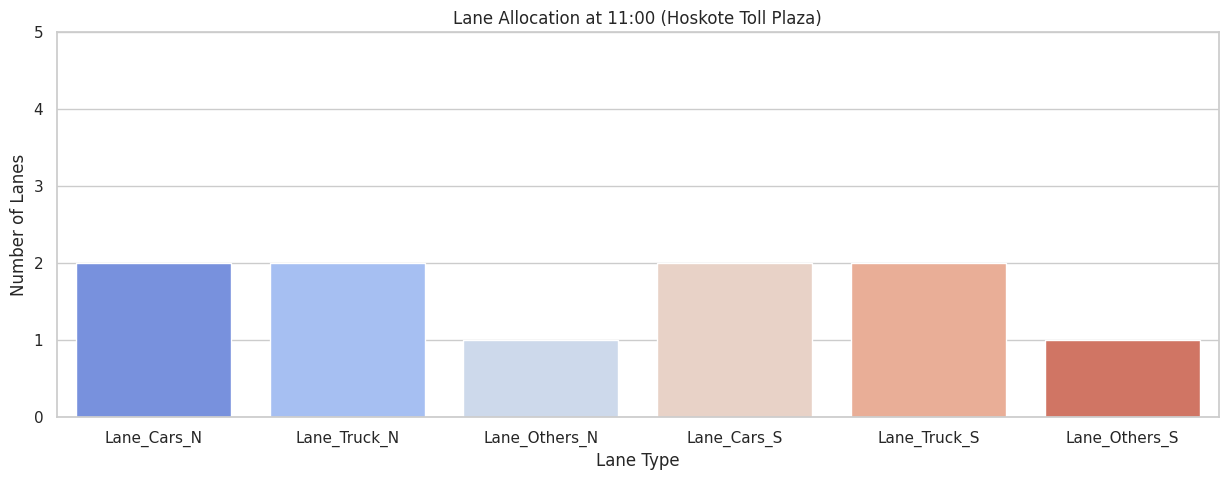

🕒 Checking 12:00 → Vehicles: 2395

🕒 Simulated Hour: 12:00
🕒 Checking 12:00 → Vehicles: 2395
🚦 Peak Hour? Yes
Updated Lane Configuration: {'Lane_Cars_N': 2, 'Lane_Truck_N': 2, 'Lane_Others_N': 1, 'Lane_Cars_S': 2, 'Lane_Truck_S': 2, 'Lane_Others_S': 1}


<ipython-input-39-ce83f35d7dd2>:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(lane_config.keys()), y=list(lane_config.values()), palette="coolwarm")


<Figure size 800x600 with 0 Axes>

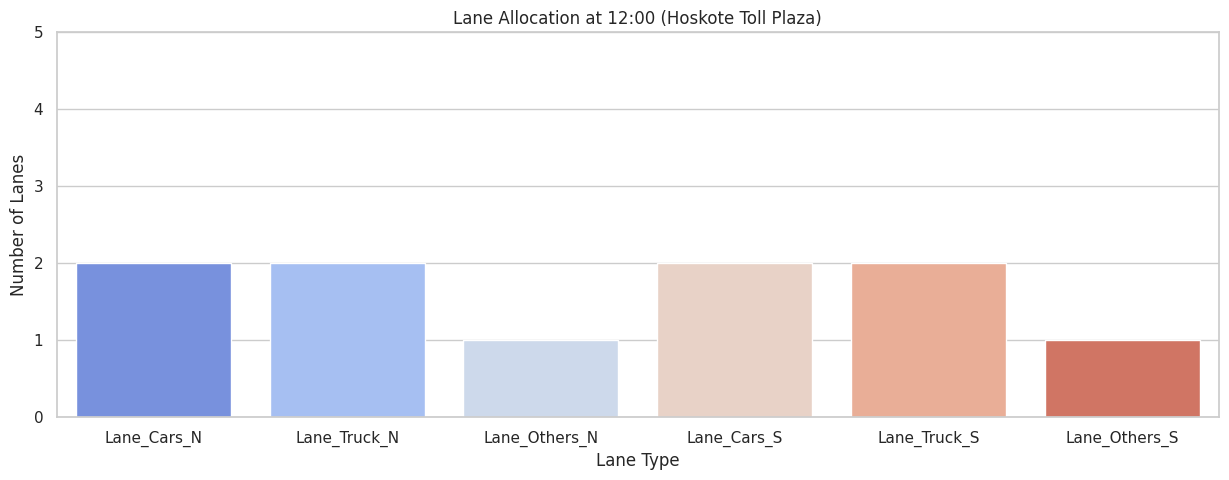

🕒 Checking 13:00 → Vehicles: 2311

🕒 Simulated Hour: 13:00
🕒 Checking 13:00 → Vehicles: 2311
🚦 Peak Hour? Yes
Updated Lane Configuration: {'Lane_Cars_N': 3, 'Lane_Truck_N': 1, 'Lane_Others_N': 1, 'Lane_Cars_S': 3, 'Lane_Truck_S': 1, 'Lane_Others_S': 1}


<ipython-input-39-ce83f35d7dd2>:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(lane_config.keys()), y=list(lane_config.values()), palette="coolwarm")


<Figure size 800x600 with 0 Axes>

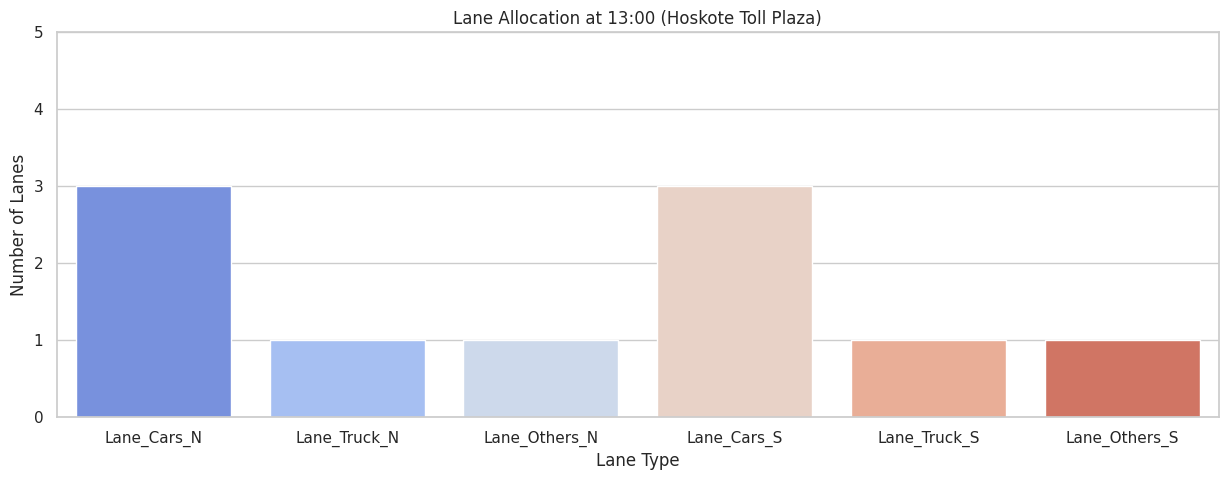

🕒 Checking 14:00 → Vehicles: 1812

🕒 Simulated Hour: 14:00
🕒 Checking 14:00 → Vehicles: 1812
🚦 Peak Hour? Yes
Updated Lane Configuration: {'Lane_Cars_N': 3, 'Lane_Truck_N': 1, 'Lane_Others_N': 1, 'Lane_Cars_S': 3, 'Lane_Truck_S': 1, 'Lane_Others_S': 1}


<ipython-input-39-ce83f35d7dd2>:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(lane_config.keys()), y=list(lane_config.values()), palette="coolwarm")


<Figure size 800x600 with 0 Axes>

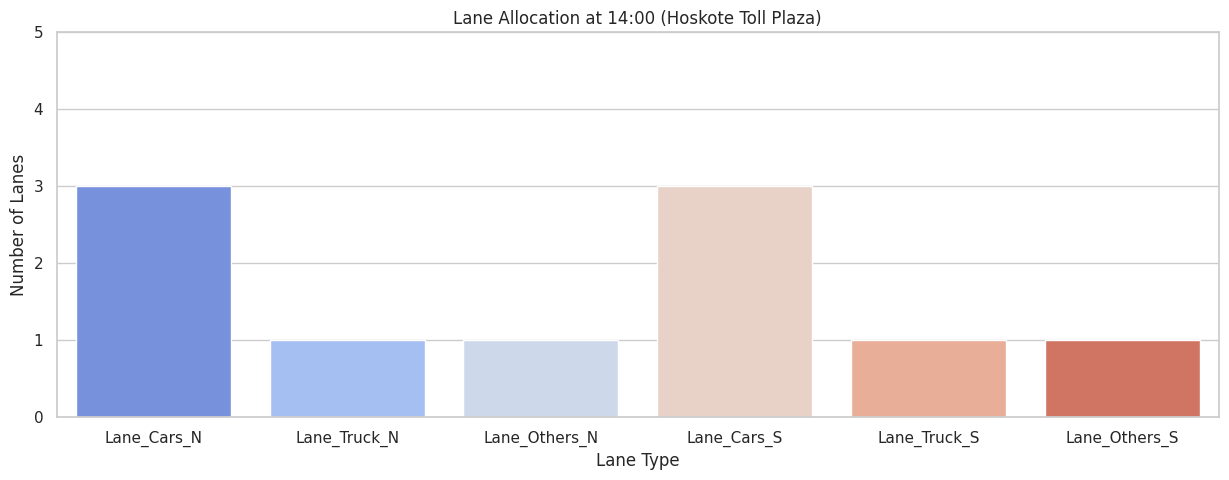

🕒 Checking 15:00 → Vehicles: 2307

🕒 Simulated Hour: 15:00
🕒 Checking 15:00 → Vehicles: 2307
🚦 Peak Hour? Yes
Updated Lane Configuration: {'Lane_Cars_N': 2, 'Lane_Truck_N': 2, 'Lane_Others_N': 1, 'Lane_Cars_S': 2, 'Lane_Truck_S': 2, 'Lane_Others_S': 1}


<ipython-input-39-ce83f35d7dd2>:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(lane_config.keys()), y=list(lane_config.values()), palette="coolwarm")


<Figure size 800x600 with 0 Axes>

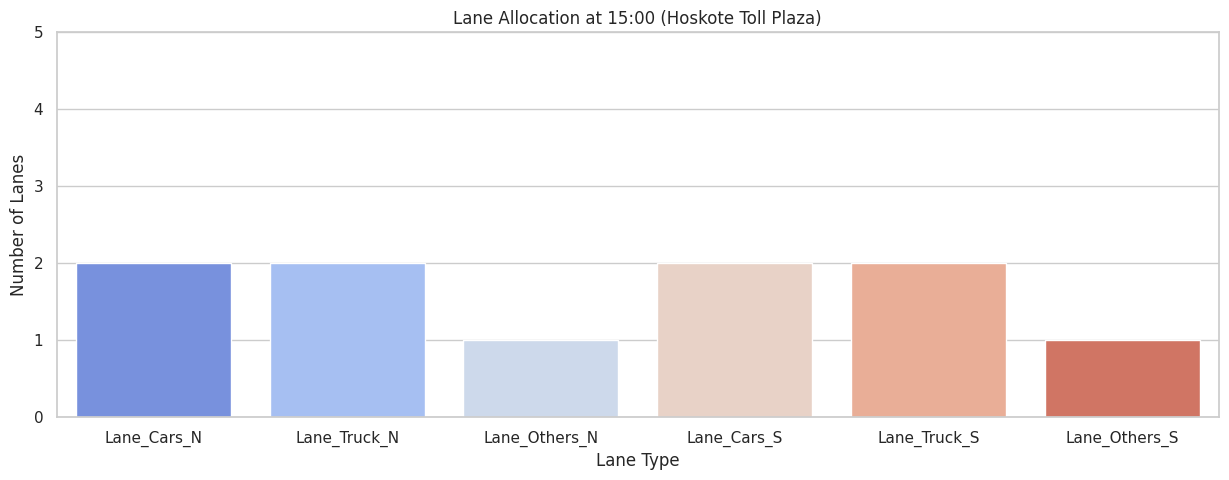

🕒 Checking 16:00 → Vehicles: 2162

🕒 Simulated Hour: 16:00
🕒 Checking 16:00 → Vehicles: 2162
🚦 Peak Hour? Yes
Updated Lane Configuration: {'Lane_Cars_N': 3, 'Lane_Truck_N': 1, 'Lane_Others_N': 1, 'Lane_Cars_S': 3, 'Lane_Truck_S': 1, 'Lane_Others_S': 1}


<ipython-input-39-ce83f35d7dd2>:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(lane_config.keys()), y=list(lane_config.values()), palette="coolwarm")


<Figure size 800x600 with 0 Axes>

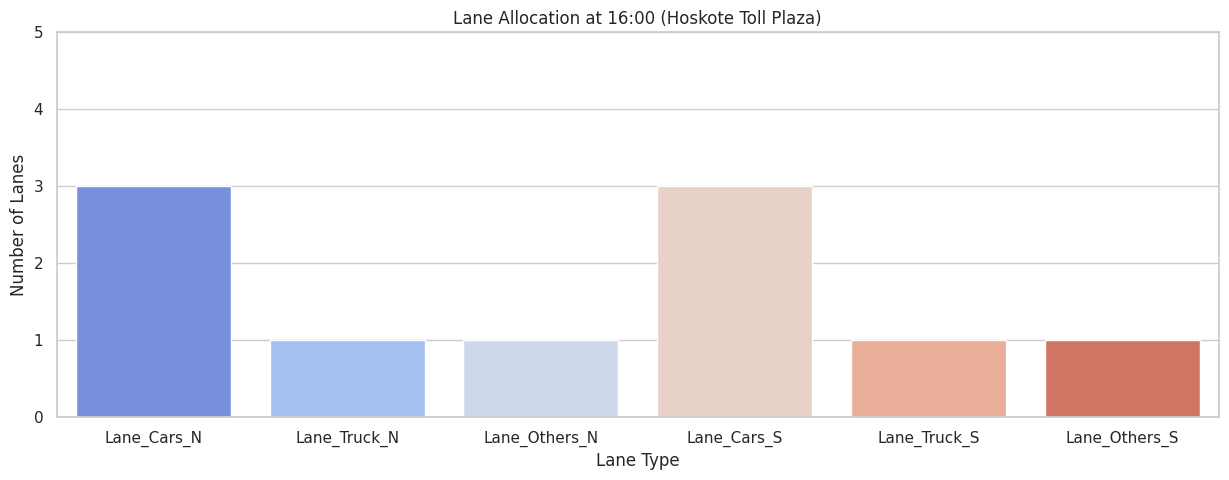

🕒 Checking 17:00 → Vehicles: 2206

🕒 Simulated Hour: 17:00
🕒 Checking 17:00 → Vehicles: 2206
🚦 Peak Hour? Yes
Updated Lane Configuration: {'Lane_Cars_N': 3, 'Lane_Truck_N': 1, 'Lane_Others_N': 1, 'Lane_Cars_S': 3, 'Lane_Truck_S': 1, 'Lane_Others_S': 1}


<ipython-input-39-ce83f35d7dd2>:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(lane_config.keys()), y=list(lane_config.values()), palette="coolwarm")


<Figure size 800x600 with 0 Axes>

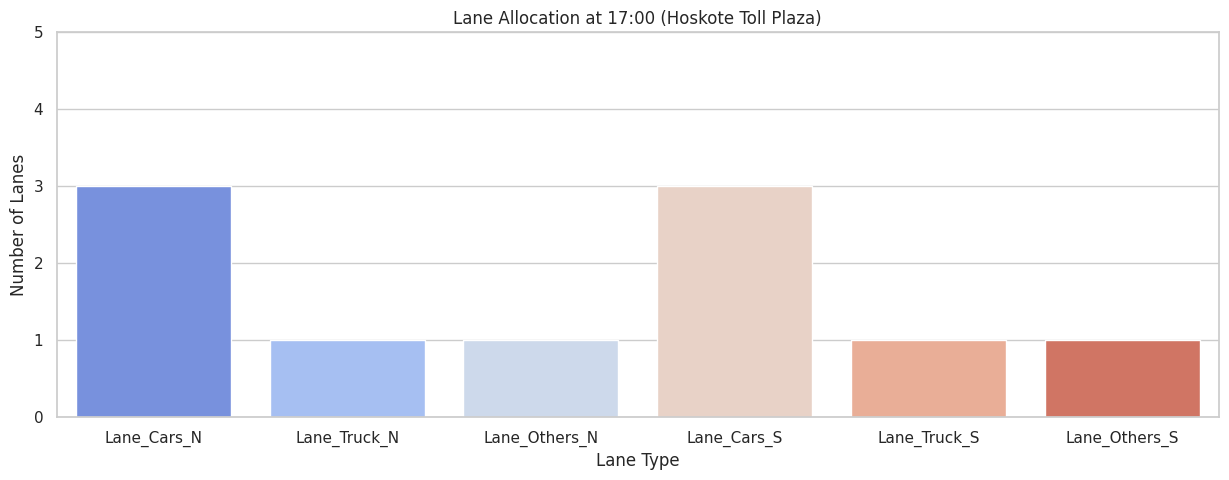

🕒 Checking 18:00 → Vehicles: 1893

🕒 Simulated Hour: 18:00
🕒 Checking 18:00 → Vehicles: 1893
🚦 Peak Hour? Yes
Updated Lane Configuration: {'Lane_Cars_N': 3, 'Lane_Truck_N': 1, 'Lane_Others_N': 1, 'Lane_Cars_S': 3, 'Lane_Truck_S': 1, 'Lane_Others_S': 1}


<ipython-input-39-ce83f35d7dd2>:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(lane_config.keys()), y=list(lane_config.values()), palette="coolwarm")


<Figure size 800x600 with 0 Axes>

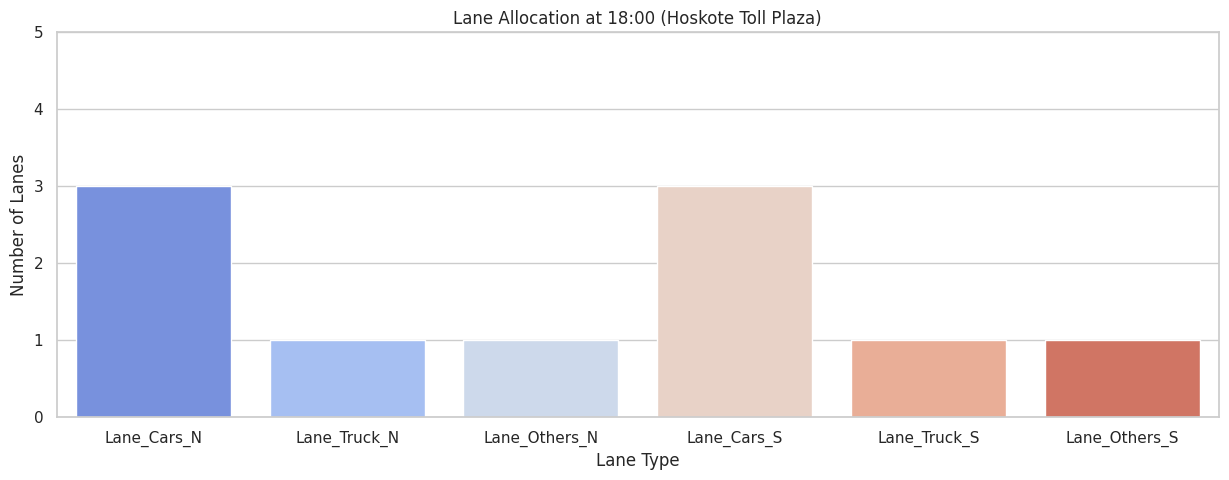

🕒 Checking 19:00 → Vehicles: 1662

🕒 Simulated Hour: 19:00
🕒 Checking 19:00 → Vehicles: 1662
🚦 Peak Hour? No
Updated Lane Configuration: {'Lane_Cars_N': 2, 'Lane_Truck_N': 2, 'Lane_Others_N': 1, 'Lane_Cars_S': 2, 'Lane_Truck_S': 2, 'Lane_Others_S': 1}


<ipython-input-39-ce83f35d7dd2>:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(lane_config.keys()), y=list(lane_config.values()), palette="coolwarm")


<Figure size 800x600 with 0 Axes>

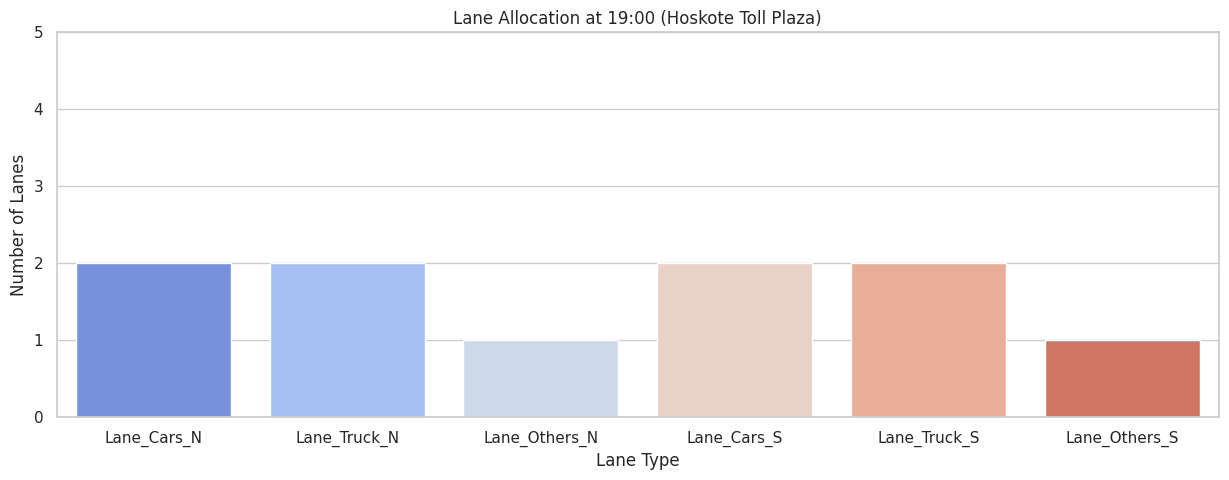

🕒 Checking 20:00 → Vehicles: 1637

🕒 Simulated Hour: 20:00
🕒 Checking 20:00 → Vehicles: 1637
🚦 Peak Hour? No
Updated Lane Configuration: {'Lane_Cars_N': 2, 'Lane_Truck_N': 2, 'Lane_Others_N': 1, 'Lane_Cars_S': 2, 'Lane_Truck_S': 2, 'Lane_Others_S': 1}


<ipython-input-39-ce83f35d7dd2>:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(lane_config.keys()), y=list(lane_config.values()), palette="coolwarm")


<Figure size 800x600 with 0 Axes>

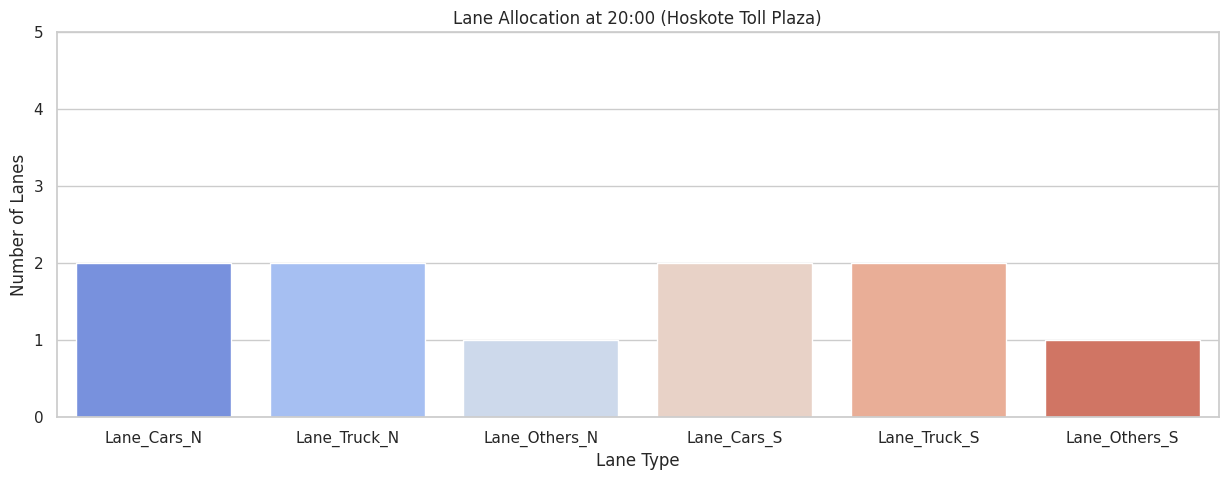

🕒 Checking 21:00 → Vehicles: 1184

🕒 Simulated Hour: 21:00
🕒 Checking 21:00 → Vehicles: 1184
🚦 Peak Hour? No
Updated Lane Configuration: {'Lane_Cars_N': 2, 'Lane_Truck_N': 2, 'Lane_Others_N': 1, 'Lane_Cars_S': 2, 'Lane_Truck_S': 2, 'Lane_Others_S': 1}


<ipython-input-39-ce83f35d7dd2>:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(lane_config.keys()), y=list(lane_config.values()), palette="coolwarm")


<Figure size 800x600 with 0 Axes>

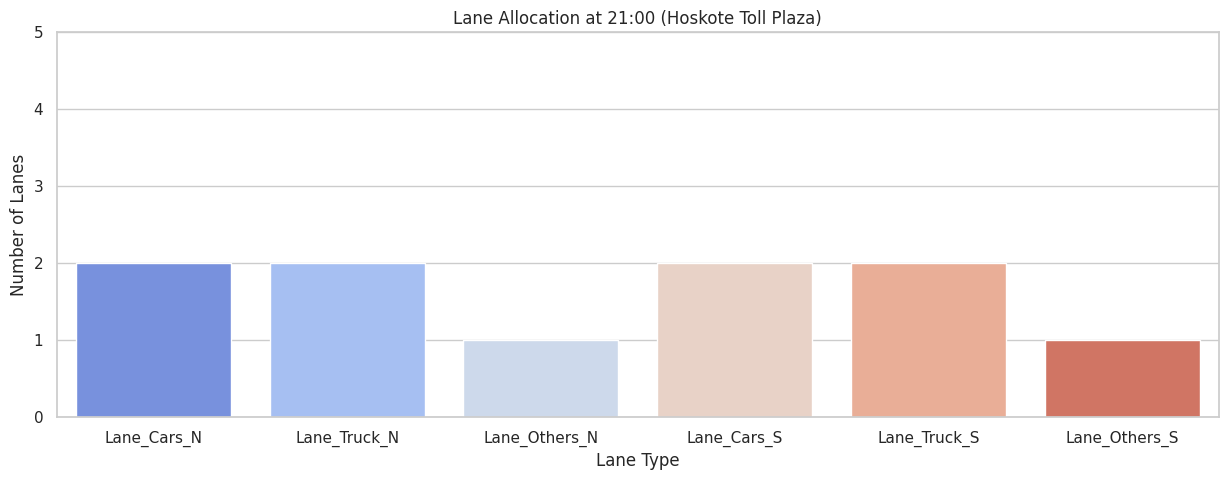

🕒 Checking 22:00 → Vehicles: 1389

🕒 Simulated Hour: 22:00
🕒 Checking 22:00 → Vehicles: 1389
🚦 Peak Hour? No
Updated Lane Configuration: {'Lane_Cars_N': 2, 'Lane_Truck_N': 2, 'Lane_Others_N': 1, 'Lane_Cars_S': 2, 'Lane_Truck_S': 2, 'Lane_Others_S': 1}


<ipython-input-39-ce83f35d7dd2>:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(lane_config.keys()), y=list(lane_config.values()), palette="coolwarm")


<Figure size 800x600 with 0 Axes>

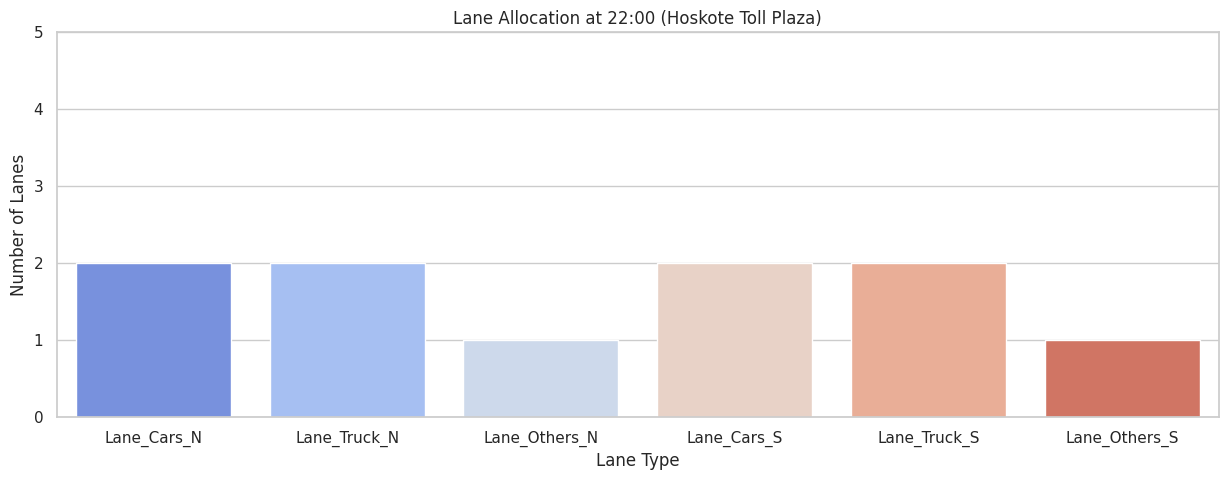

🕒 Checking 23:00 → Vehicles: 1683

🕒 Simulated Hour: 23:00
🕒 Checking 23:00 → Vehicles: 1683
🚦 Peak Hour? No
Updated Lane Configuration: {'Lane_Cars_N': 2, 'Lane_Truck_N': 2, 'Lane_Others_N': 1, 'Lane_Cars_S': 2, 'Lane_Truck_S': 2, 'Lane_Others_S': 1}


<ipython-input-39-ce83f35d7dd2>:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(lane_config.keys()), y=list(lane_config.values()), palette="coolwarm")


<Figure size 800x600 with 0 Axes>

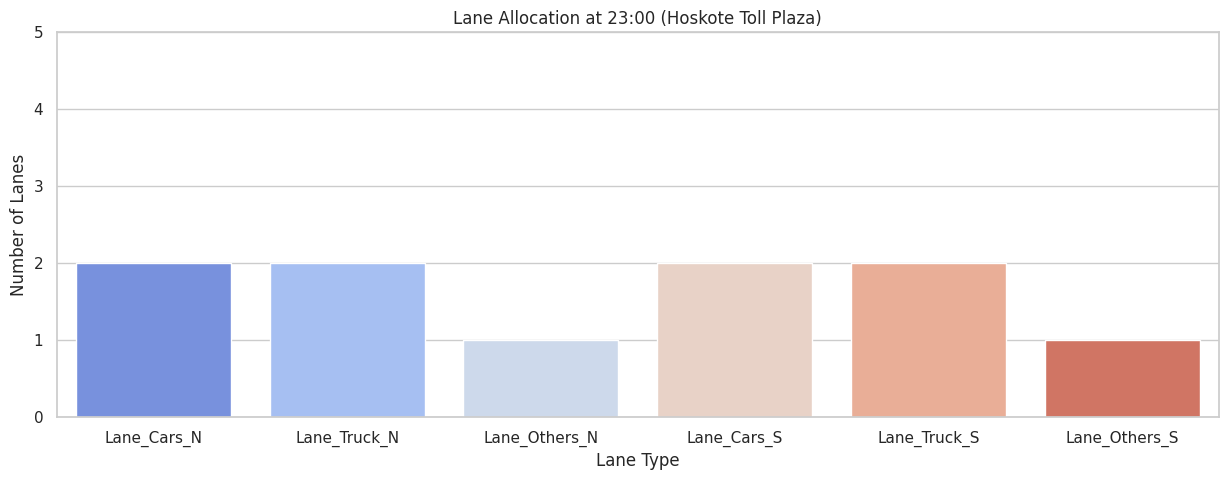

<Figure size 800x600 with 0 Axes>

In [39]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import random
import time

# Load historical toll data
df = pd.read_csv("Bangalore_1Day_NETC.csv")

# Filter for Hoskote Toll Plaza
df_hoskote = df[df['merchant_name'] == 'Hoskote Toll Plaza']

# 1. Clean 'initiated_time'
df_hoskote['initiated_time'] = df_hoskote['initiated_time'].astype(str).str.replace('00-01-1900', '').str.strip()
df_hoskote['initiated_time'] = pd.to_datetime(df_hoskote['initiated_time'], format='%H:%M', errors='coerce')

# 2. Extract hour
df_hoskote['hour'] = df_hoskote['initiated_time'].dt.strftime("%H")

# 3. Segregate lanes into North (N) & South (S)
df_hoskote['lane_direction'] = df_hoskote['lane'].apply(lambda x: 'N' if 'N' in x else 'S')

# Define lane allocation thresholds
CAR_LANE_THRESHOLD = 50  # If a car lane has more than this, add a new lane
TOTAL_VEHICLE_PEAK_THRESHOLD = 1750  # Peak hour threshold
DEFAULT_LANE_CONFIG = {
    "Lane_Cars_N": 2, "Lane_Truck_N": 2, "Lane_Others_N": 1,  # Northbound lanes
    "Lane_Cars_S": 2, "Lane_Truck_S": 2, "Lane_Others_S": 1   # Southbound lanes
}

# Function to check if the current time is peak hour
def check_if_peak_hour(simulated_hour):
    hour_traffic = df_hoskote[df_hoskote["hour"] == simulated_hour]
    total_vehicles = len(hour_traffic)

    print(f"🕒 Checking {simulated_hour}:00 → Vehicles: {total_vehicles}")

    return total_vehicles > TOTAL_VEHICLE_PEAK_THRESHOLD  # Returns True if it's peak hour

# Function to reallocate a lane for cars
def reallocate_lane_to_cars():
    return {
        "Lane_Cars_N": 3, "Lane_Truck_N": 1, "Lane_Others_N": 1,  # More lanes for cars (North)
        "Lane_Cars_S": 3, "Lane_Truck_S": 1, "Lane_Others_S": 1   # More lanes for cars (South)
    }

# Function to dynamically adjust lanes for peak hours
def adjust_lanes_peak_hours(simulated_hour, vehicle_counts):
    is_peak_hour = check_if_peak_hour(simulated_hour)

    if is_peak_hour and (vehicle_counts["Lane_Cars_N"] > CAR_LANE_THRESHOLD or vehicle_counts["Lane_Cars_S"] > CAR_LANE_THRESHOLD):
        return reallocate_lane_to_cars()  # Adjust lanes dynamically
    return DEFAULT_LANE_CONFIG

# Visualization function
def plot_lane_allocation(lane_config, simulated_hour):
    plt.figure(figsize=(15, 5))
    sns.barplot(x=list(lane_config.keys()), y=list(lane_config.values()), palette="coolwarm")
    plt.ylim(0, 5)
    plt.xlabel("Lane Type")
    plt.ylabel("Number of Lanes")
    plt.title(f"Lane Allocation at {simulated_hour}:00 (Hoskote Toll Plaza)")
    plt.show(block=False)
    plt.pause(2)  # Pause for visualization
    plt.clf()

# Simulating for every hour from 12 AM to 11 PM
simulated_hours = [str(hour).zfill(2) for hour in range(0, 24)]  # Ensures proper matching

for simulated_hour in simulated_hours:
    vehicle_counts = {
        "Lane_Cars_N": random.randint(30, 70),  # Randomized to simulate live data
        "Lane_Truck_N": random.randint(10, 40),
        "Lane_Others_N": random.randint(5, 20),
        "Lane_Cars_S": random.randint(30, 70),
        "Lane_Truck_S": random.randint(10, 40),
        "Lane_Others_S": random.randint(5, 20),
    }

    new_lane_config = adjust_lanes_peak_hours(simulated_hour, vehicle_counts)

    print(f"\n🕒 Simulated Hour: {simulated_hour}:00")
    print(f"🚦 Peak Hour? {'Yes' if check_if_peak_hour(simulated_hour) else 'No'}")
    print("Updated Lane Configuration:", new_lane_config)

    plot_lane_allocation(new_lane_config, simulated_hour)
    time.sleep(2)  # Shorter delay for smoother execution


<ipython-input-41-b9dac643c932>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hoskote['initiated_time'] = df_hoskote['initiated_time'].astype(str).str.replace('00-01-1900', '').str.strip()
<ipython-input-41-b9dac643c932>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hoskote['initiated_time'] = pd.to_datetime(df_hoskote['initiated_time'], format='%H:%M', errors='coerce')
<ipython-input-41-b9dac643c932>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

🕒 Checking 00:00 → Vehicles: 512

🕒 Simulated Hour: 00:00
🕒 Checking 00:00 → Vehicles: 512
🚦 Peak Hour? No
Updated Lane Configuration: {'Lane_Cars': 2, 'Lane_Truck': 2, 'Lane_Others': 1}


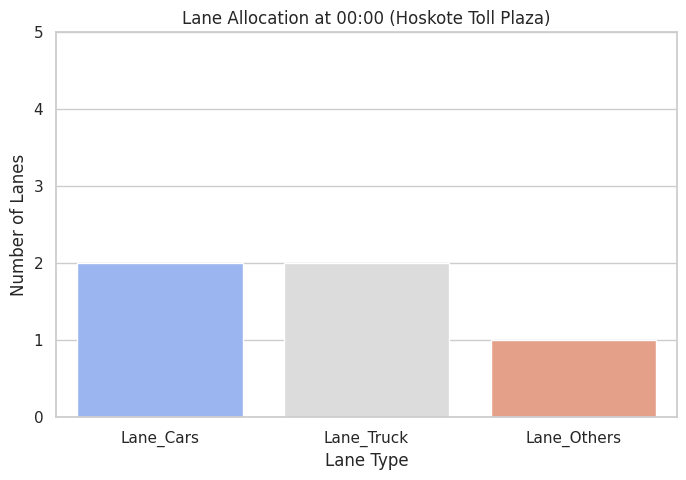

🕒 Checking 01:00 → Vehicles: 518

🕒 Simulated Hour: 01:00
🕒 Checking 01:00 → Vehicles: 518
🚦 Peak Hour? No
Updated Lane Configuration: {'Lane_Cars': 2, 'Lane_Truck': 2, 'Lane_Others': 1}


<ipython-input-41-b9dac643c932>:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(lane_config.keys()), y=list(lane_config.values()), palette="coolwarm")


<Figure size 800x600 with 0 Axes>

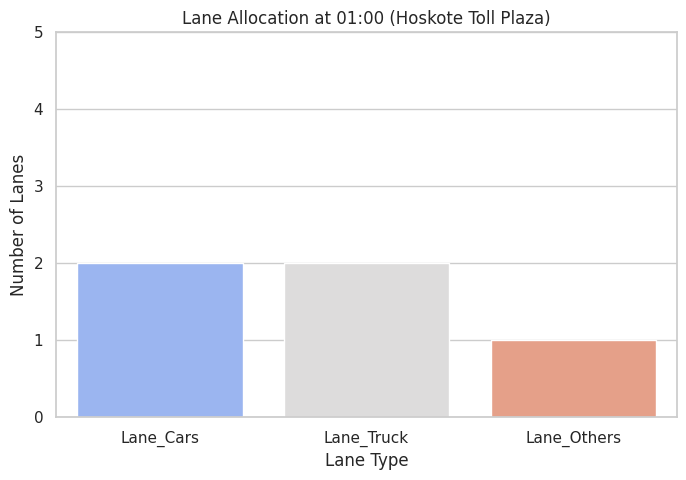

🕒 Checking 02:00 → Vehicles: 433

🕒 Simulated Hour: 02:00
🕒 Checking 02:00 → Vehicles: 433
🚦 Peak Hour? No
Updated Lane Configuration: {'Lane_Cars': 2, 'Lane_Truck': 2, 'Lane_Others': 1}


<ipython-input-41-b9dac643c932>:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(lane_config.keys()), y=list(lane_config.values()), palette="coolwarm")


<Figure size 800x600 with 0 Axes>

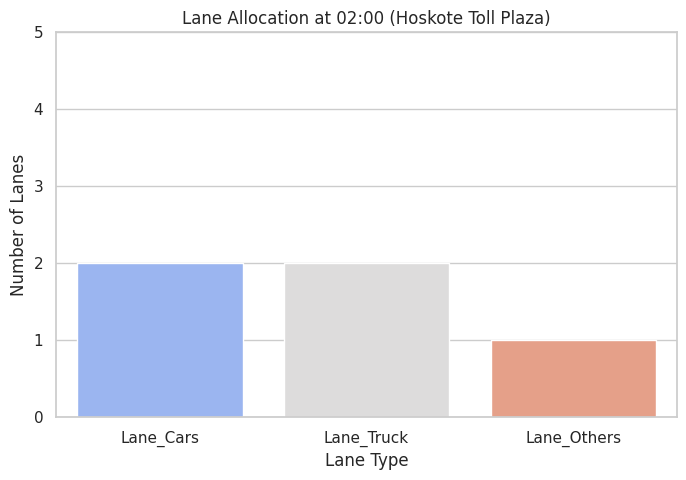

🕒 Checking 03:00 → Vehicles: 346

🕒 Simulated Hour: 03:00
🕒 Checking 03:00 → Vehicles: 346
🚦 Peak Hour? No
Updated Lane Configuration: {'Lane_Cars': 2, 'Lane_Truck': 2, 'Lane_Others': 1}


<ipython-input-41-b9dac643c932>:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(lane_config.keys()), y=list(lane_config.values()), palette="coolwarm")


<Figure size 800x600 with 0 Axes>

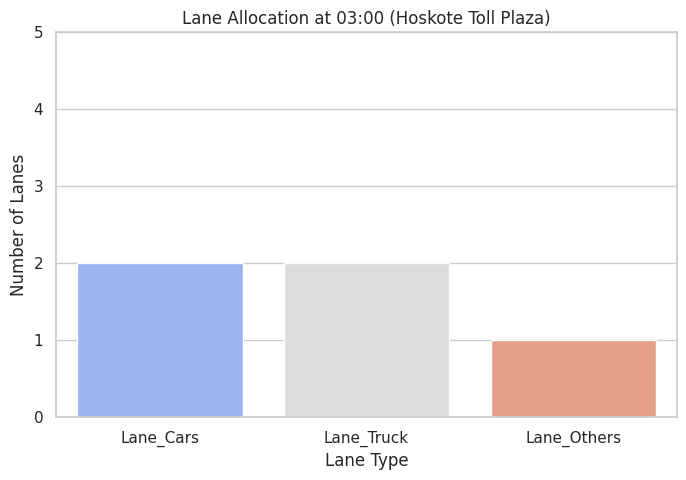

🕒 Checking 04:00 → Vehicles: 389

🕒 Simulated Hour: 04:00
🕒 Checking 04:00 → Vehicles: 389
🚦 Peak Hour? No
Updated Lane Configuration: {'Lane_Cars': 2, 'Lane_Truck': 2, 'Lane_Others': 1}


<ipython-input-41-b9dac643c932>:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(lane_config.keys()), y=list(lane_config.values()), palette="coolwarm")


<Figure size 800x600 with 0 Axes>

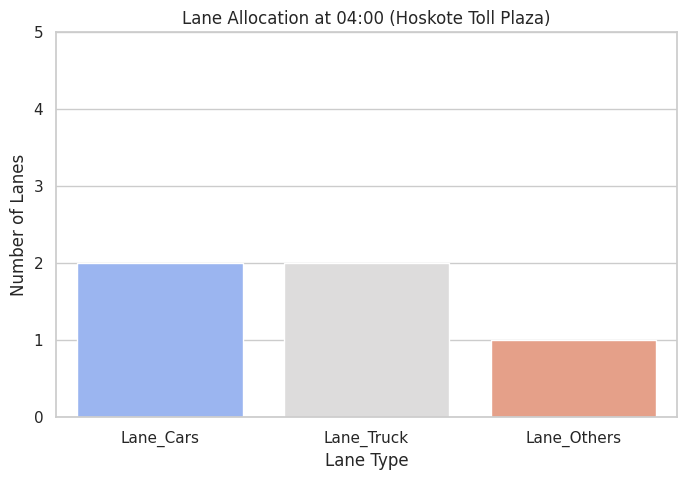

🕒 Checking 05:00 → Vehicles: 576

🕒 Simulated Hour: 05:00
🕒 Checking 05:00 → Vehicles: 576
🚦 Peak Hour? No
Updated Lane Configuration: {'Lane_Cars': 2, 'Lane_Truck': 2, 'Lane_Others': 1}


<ipython-input-41-b9dac643c932>:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(lane_config.keys()), y=list(lane_config.values()), palette="coolwarm")


<Figure size 800x600 with 0 Axes>

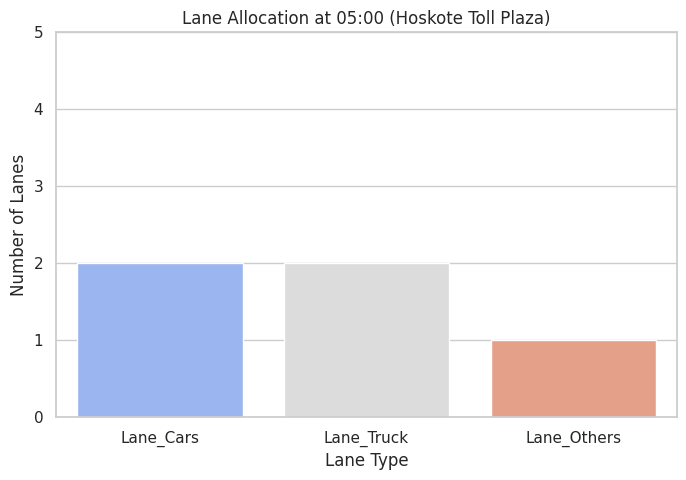

🕒 Checking 06:00 → Vehicles: 1226

🕒 Simulated Hour: 06:00
🕒 Checking 06:00 → Vehicles: 1226
🚦 Peak Hour? No
Updated Lane Configuration: {'Lane_Cars': 2, 'Lane_Truck': 2, 'Lane_Others': 1}


<ipython-input-41-b9dac643c932>:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(lane_config.keys()), y=list(lane_config.values()), palette="coolwarm")


<Figure size 800x600 with 0 Axes>

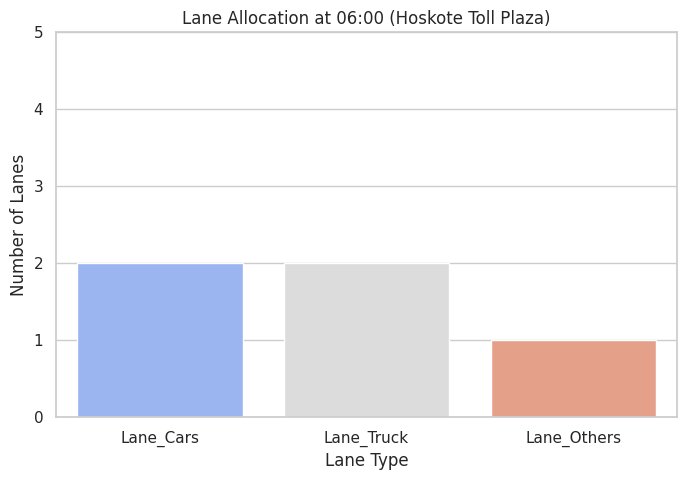

🕒 Checking 07:00 → Vehicles: 1766

🕒 Simulated Hour: 07:00
🕒 Checking 07:00 → Vehicles: 1766
🚦 Peak Hour? Yes
Updated Lane Configuration: {'Lane_Cars': 3, 'Lane_Truck': 1, 'Lane_Others': 1}


<ipython-input-41-b9dac643c932>:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(lane_config.keys()), y=list(lane_config.values()), palette="coolwarm")


<Figure size 800x600 with 0 Axes>

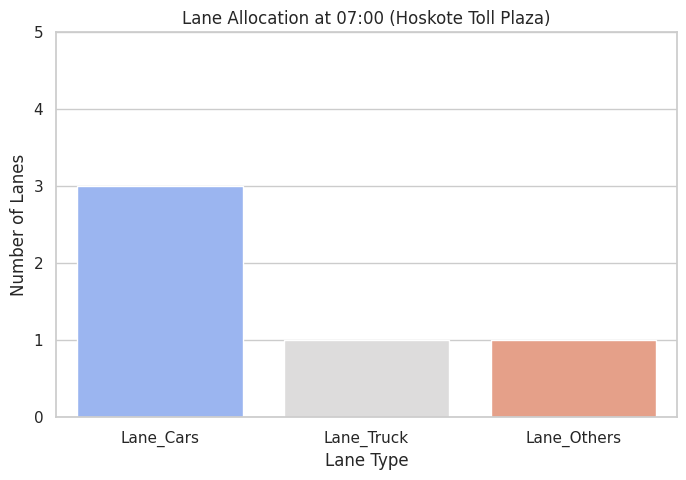

🕒 Checking 08:00 → Vehicles: 1726

🕒 Simulated Hour: 08:00
🕒 Checking 08:00 → Vehicles: 1726
🚦 Peak Hour? No
Updated Lane Configuration: {'Lane_Cars': 2, 'Lane_Truck': 2, 'Lane_Others': 1}


<ipython-input-41-b9dac643c932>:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(lane_config.keys()), y=list(lane_config.values()), palette="coolwarm")


<Figure size 800x600 with 0 Axes>

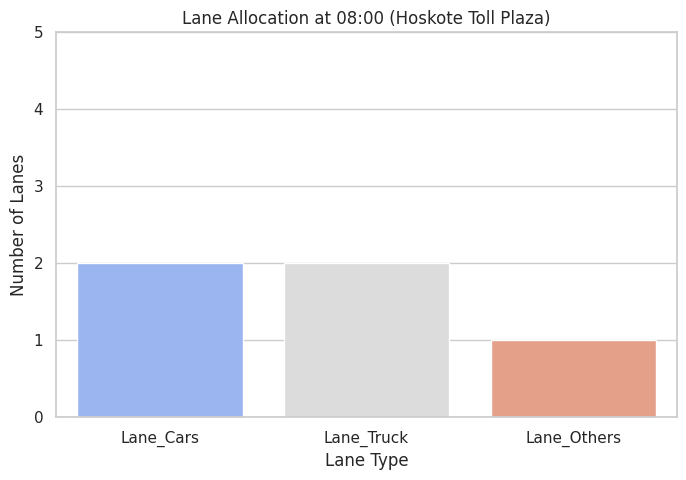

🕒 Checking 09:00 → Vehicles: 1856

🕒 Simulated Hour: 09:00
🕒 Checking 09:00 → Vehicles: 1856
🚦 Peak Hour? Yes
Updated Lane Configuration: {'Lane_Cars': 2, 'Lane_Truck': 2, 'Lane_Others': 1}


<ipython-input-41-b9dac643c932>:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(lane_config.keys()), y=list(lane_config.values()), palette="coolwarm")


<Figure size 800x600 with 0 Axes>

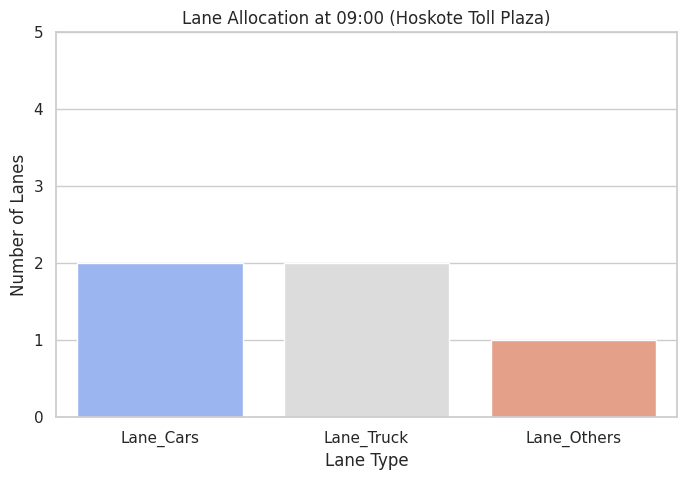

🕒 Checking 10:00 → Vehicles: 2033

🕒 Simulated Hour: 10:00
🕒 Checking 10:00 → Vehicles: 2033
🚦 Peak Hour? Yes
Updated Lane Configuration: {'Lane_Cars': 3, 'Lane_Truck': 1, 'Lane_Others': 1}


<ipython-input-41-b9dac643c932>:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(lane_config.keys()), y=list(lane_config.values()), palette="coolwarm")


<Figure size 800x600 with 0 Axes>

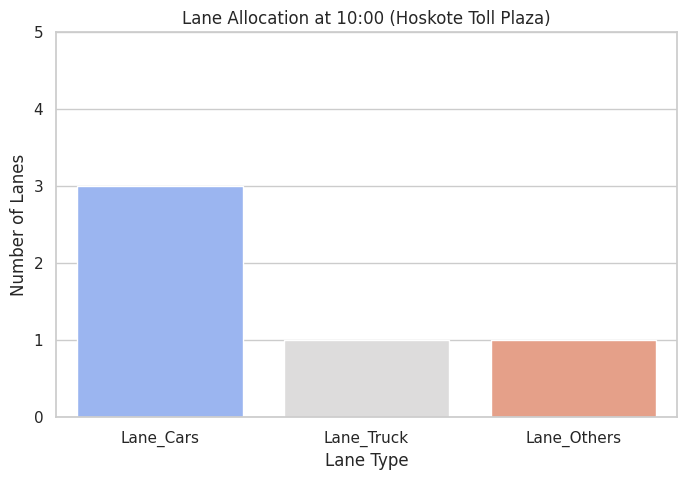

🕒 Checking 11:00 → Vehicles: 2673

🕒 Simulated Hour: 11:00
🕒 Checking 11:00 → Vehicles: 2673
🚦 Peak Hour? Yes
Updated Lane Configuration: {'Lane_Cars': 2, 'Lane_Truck': 2, 'Lane_Others': 1}


<ipython-input-41-b9dac643c932>:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(lane_config.keys()), y=list(lane_config.values()), palette="coolwarm")


<Figure size 800x600 with 0 Axes>

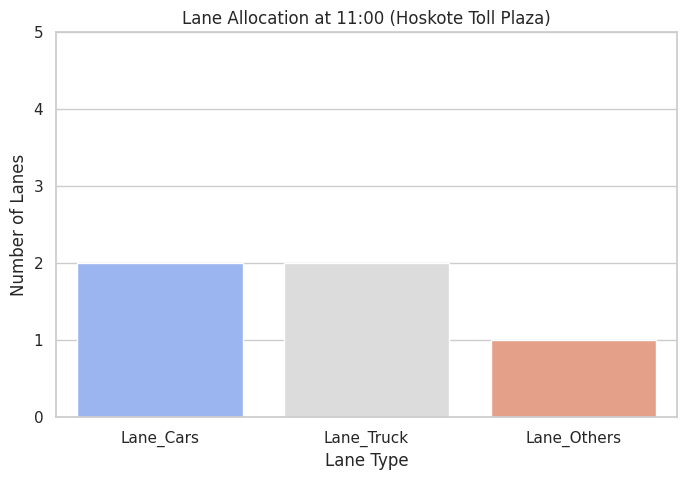

🕒 Checking 12:00 → Vehicles: 2395

🕒 Simulated Hour: 12:00
🕒 Checking 12:00 → Vehicles: 2395
🚦 Peak Hour? Yes
Updated Lane Configuration: {'Lane_Cars': 2, 'Lane_Truck': 2, 'Lane_Others': 1}


<ipython-input-41-b9dac643c932>:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(lane_config.keys()), y=list(lane_config.values()), palette="coolwarm")


<Figure size 800x600 with 0 Axes>

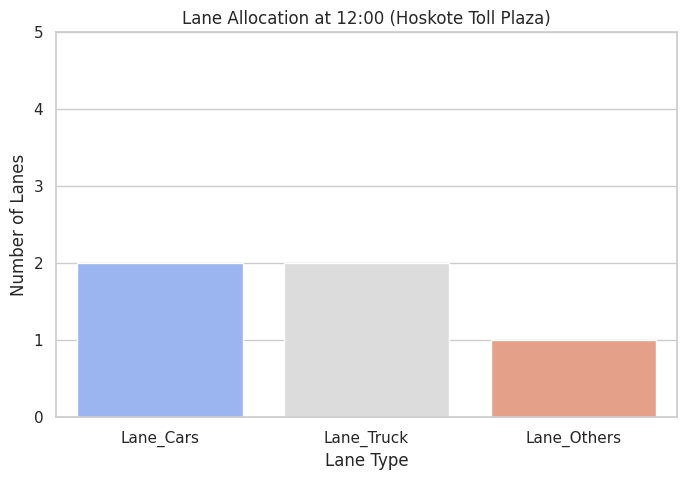

🕒 Checking 13:00 → Vehicles: 2311

🕒 Simulated Hour: 13:00
🕒 Checking 13:00 → Vehicles: 2311
🚦 Peak Hour? Yes
Updated Lane Configuration: {'Lane_Cars': 3, 'Lane_Truck': 1, 'Lane_Others': 1}


<ipython-input-41-b9dac643c932>:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(lane_config.keys()), y=list(lane_config.values()), palette="coolwarm")


<Figure size 800x600 with 0 Axes>

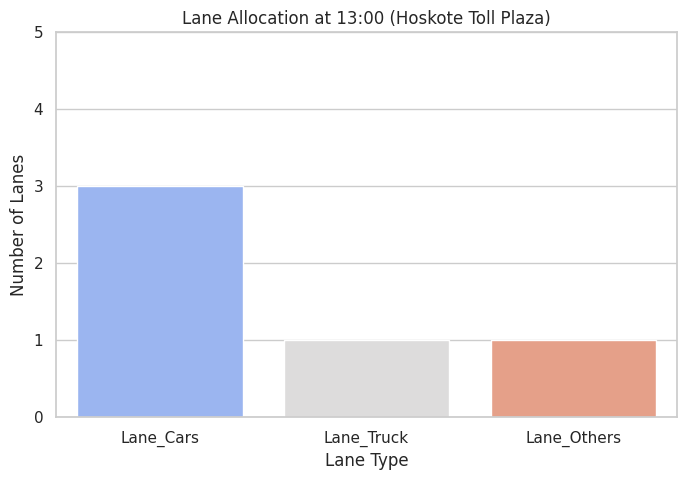

🕒 Checking 14:00 → Vehicles: 1812

🕒 Simulated Hour: 14:00
🕒 Checking 14:00 → Vehicles: 1812
🚦 Peak Hour? Yes
Updated Lane Configuration: {'Lane_Cars': 3, 'Lane_Truck': 1, 'Lane_Others': 1}


<ipython-input-41-b9dac643c932>:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(lane_config.keys()), y=list(lane_config.values()), palette="coolwarm")


<Figure size 800x600 with 0 Axes>

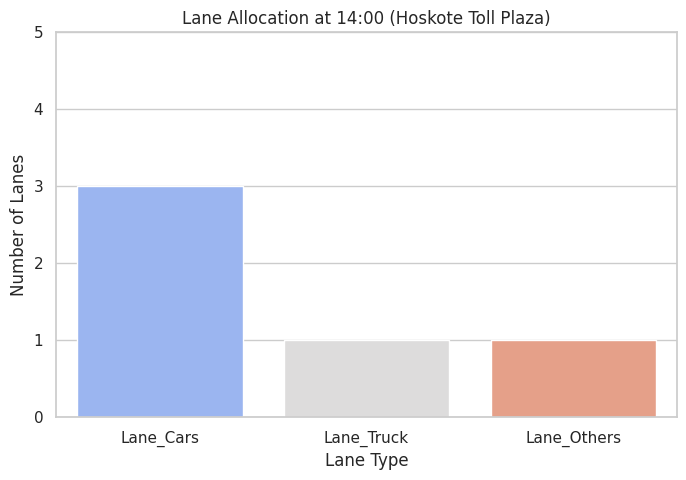

🕒 Checking 15:00 → Vehicles: 2307

🕒 Simulated Hour: 15:00
🕒 Checking 15:00 → Vehicles: 2307
🚦 Peak Hour? Yes
Updated Lane Configuration: {'Lane_Cars': 2, 'Lane_Truck': 2, 'Lane_Others': 1}


<ipython-input-41-b9dac643c932>:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(lane_config.keys()), y=list(lane_config.values()), palette="coolwarm")


<Figure size 800x600 with 0 Axes>

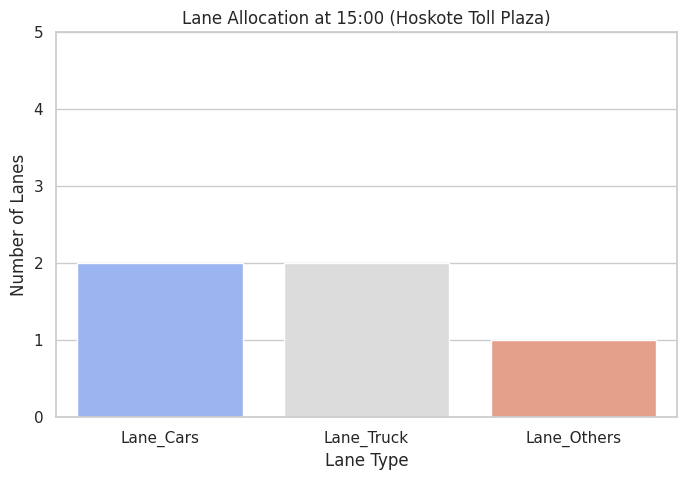

🕒 Checking 16:00 → Vehicles: 2162

🕒 Simulated Hour: 16:00
🕒 Checking 16:00 → Vehicles: 2162
🚦 Peak Hour? Yes
Updated Lane Configuration: {'Lane_Cars': 3, 'Lane_Truck': 1, 'Lane_Others': 1}


<ipython-input-41-b9dac643c932>:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(lane_config.keys()), y=list(lane_config.values()), palette="coolwarm")


<Figure size 800x600 with 0 Axes>

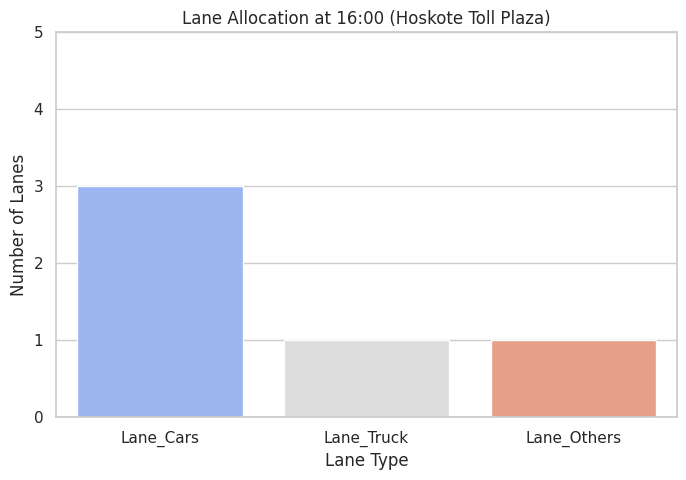

🕒 Checking 17:00 → Vehicles: 2206

🕒 Simulated Hour: 17:00
🕒 Checking 17:00 → Vehicles: 2206
🚦 Peak Hour? Yes
Updated Lane Configuration: {'Lane_Cars': 3, 'Lane_Truck': 1, 'Lane_Others': 1}


<ipython-input-41-b9dac643c932>:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(lane_config.keys()), y=list(lane_config.values()), palette="coolwarm")


<Figure size 800x600 with 0 Axes>

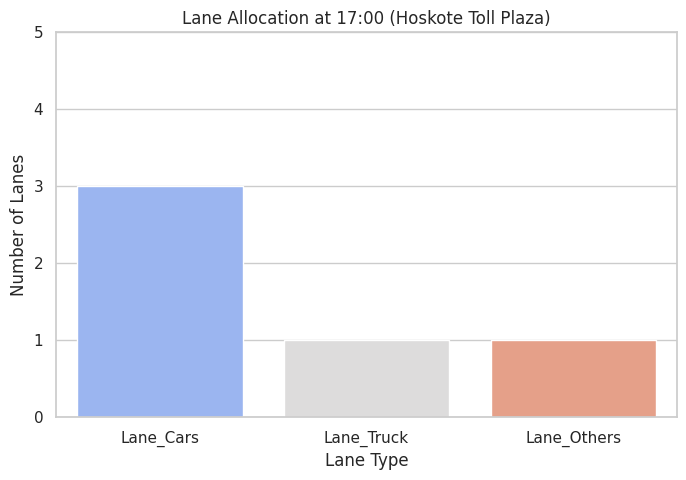

🕒 Checking 18:00 → Vehicles: 1893

🕒 Simulated Hour: 18:00
🕒 Checking 18:00 → Vehicles: 1893
🚦 Peak Hour? Yes
Updated Lane Configuration: {'Lane_Cars': 2, 'Lane_Truck': 2, 'Lane_Others': 1}


<ipython-input-41-b9dac643c932>:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(lane_config.keys()), y=list(lane_config.values()), palette="coolwarm")


<Figure size 800x600 with 0 Axes>

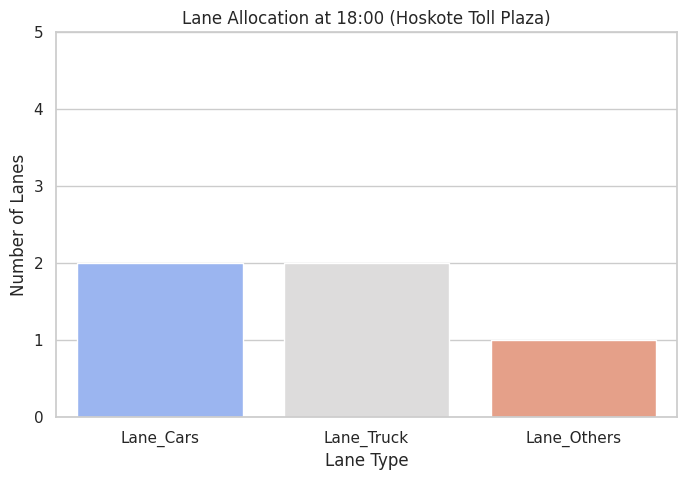

🕒 Checking 19:00 → Vehicles: 1662

🕒 Simulated Hour: 19:00
🕒 Checking 19:00 → Vehicles: 1662
🚦 Peak Hour? No
Updated Lane Configuration: {'Lane_Cars': 2, 'Lane_Truck': 2, 'Lane_Others': 1}


<ipython-input-41-b9dac643c932>:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(lane_config.keys()), y=list(lane_config.values()), palette="coolwarm")


<Figure size 800x600 with 0 Axes>

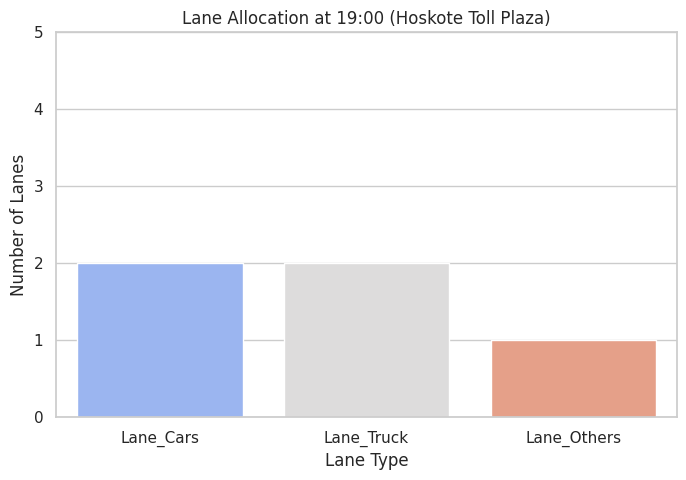

🕒 Checking 20:00 → Vehicles: 1637

🕒 Simulated Hour: 20:00
🕒 Checking 20:00 → Vehicles: 1637
🚦 Peak Hour? No
Updated Lane Configuration: {'Lane_Cars': 2, 'Lane_Truck': 2, 'Lane_Others': 1}


<ipython-input-41-b9dac643c932>:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(lane_config.keys()), y=list(lane_config.values()), palette="coolwarm")


<Figure size 800x600 with 0 Axes>

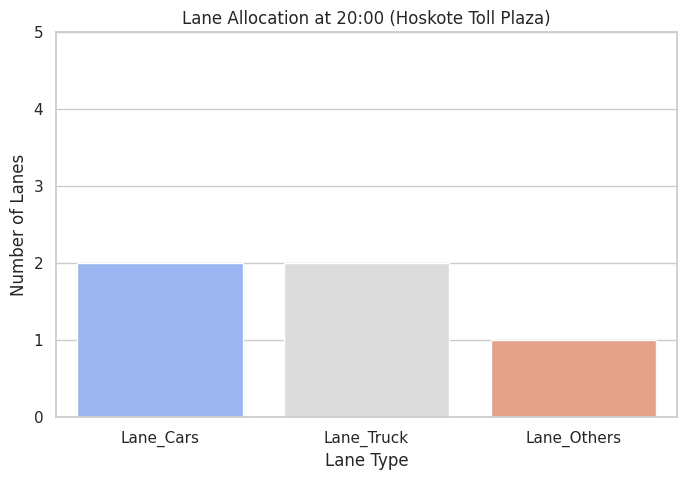

🕒 Checking 21:00 → Vehicles: 1184

🕒 Simulated Hour: 21:00
🕒 Checking 21:00 → Vehicles: 1184
🚦 Peak Hour? No
Updated Lane Configuration: {'Lane_Cars': 2, 'Lane_Truck': 2, 'Lane_Others': 1}


<ipython-input-41-b9dac643c932>:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(lane_config.keys()), y=list(lane_config.values()), palette="coolwarm")


<Figure size 800x600 with 0 Axes>

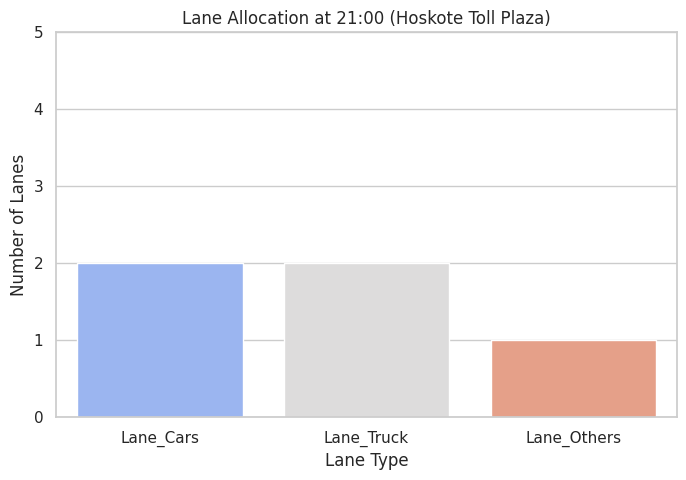

🕒 Checking 22:00 → Vehicles: 1389

🕒 Simulated Hour: 22:00
🕒 Checking 22:00 → Vehicles: 1389
🚦 Peak Hour? No
Updated Lane Configuration: {'Lane_Cars': 2, 'Lane_Truck': 2, 'Lane_Others': 1}


<ipython-input-41-b9dac643c932>:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(lane_config.keys()), y=list(lane_config.values()), palette="coolwarm")


<Figure size 800x600 with 0 Axes>

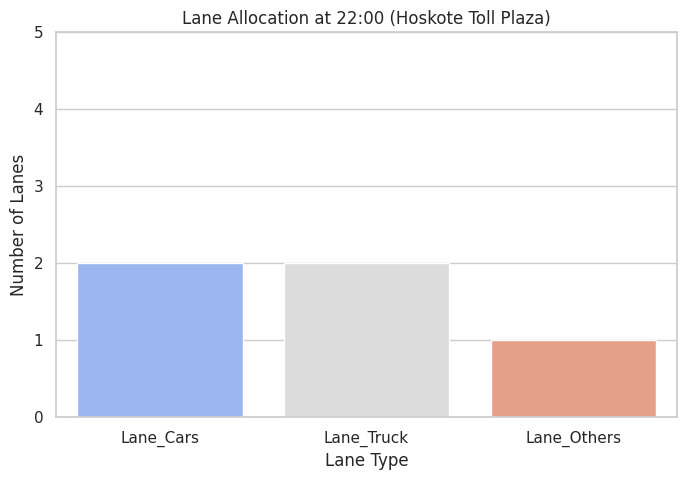

🕒 Checking 23:00 → Vehicles: 1683

🕒 Simulated Hour: 23:00
🕒 Checking 23:00 → Vehicles: 1683
🚦 Peak Hour? No
Updated Lane Configuration: {'Lane_Cars': 2, 'Lane_Truck': 2, 'Lane_Others': 1}


<ipython-input-41-b9dac643c932>:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(lane_config.keys()), y=list(lane_config.values()), palette="coolwarm")


<Figure size 800x600 with 0 Axes>

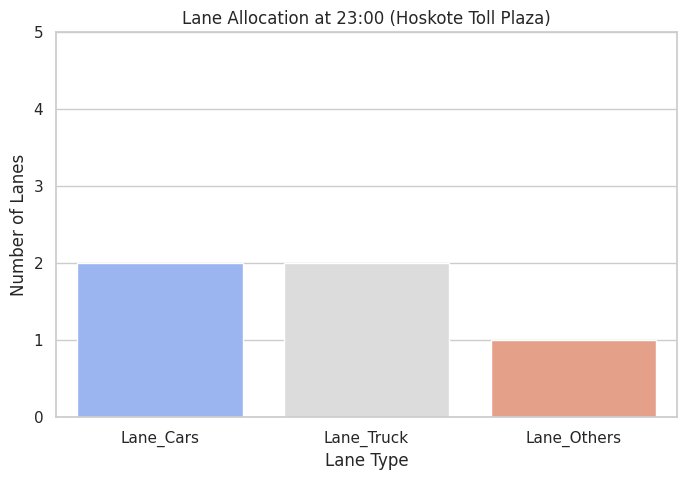

<Figure size 800x600 with 0 Axes>

In [41]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import random
import time

# Load historical toll data
df = pd.read_csv("Bangalore_1Day_NETC.csv")

# Filter for Hoskote Toll Plaza
df_hoskote = df[df['merchant_name'] == 'Hoskote Toll Plaza']

# 1. Clean 'initiated_time'
df_hoskote['initiated_time'] = df_hoskote['initiated_time'].astype(str).str.replace('00-01-1900', '').str.strip()
df_hoskote['initiated_time'] = pd.to_datetime(df_hoskote['initiated_time'], format='%H:%M', errors='coerce')

# 2. Extract hour
df_hoskote['hour'] = df_hoskote['initiated_time'].dt.strftime("%H")

# Define lane allocation thresholds
CAR_LANE_THRESHOLD = 50  # If a car lane has more than this, add a new lane
TOTAL_VEHICLE_PEAK_THRESHOLD = 1750  # Peak hour threshold
DEFAULT_LANE_CONFIG = {"Lane_Cars": 2, "Lane_Truck": 2, "Lane_Others": 1}

# Function to check if the current time is peak hour
def check_if_peak_hour(simulated_hour):
    hour_traffic = df_hoskote[df_hoskote["hour"] == simulated_hour]
    total_vehicles = len(hour_traffic)

    print(f"🕒 Checking {simulated_hour}:00 → Vehicles: {total_vehicles}")

    return total_vehicles > TOTAL_VEHICLE_PEAK_THRESHOLD  # Returns True if it's peak hour

# Function to reallocate a lane for cars
def reallocate_lane_to_cars():
    return {"Lane_Cars": 3, "Lane_Truck": 1, "Lane_Others": 1}  # More lanes for cars

# Function to dynamically adjust lanes for peak hours
def adjust_lanes_peak_hours(simulated_hour, vehicle_counts):
    is_peak_hour = check_if_peak_hour(simulated_hour)

    if is_peak_hour and vehicle_counts["Lane_Cars"] > CAR_LANE_THRESHOLD:
        return reallocate_lane_to_cars()  # Adjust lanes dynamically
    return DEFAULT_LANE_CONFIG

# Visualization function
def plot_lane_allocation(lane_config, simulated_hour):
    plt.figure(figsize=(8, 5))
    sns.barplot(x=list(lane_config.keys()), y=list(lane_config.values()), palette="coolwarm")
    plt.ylim(0, 5)
    plt.xlabel("Lane Type")
    plt.ylabel("Number of Lanes")
    plt.title(f"Lane Allocation at {simulated_hour}:00 (Hoskote Toll Plaza)")
    plt.show(block=False)
    plt.pause(2)  # Pause for visualization
    plt.clf()

# Simulating for every hour from 12 AM to 11 PM
simulated_hours = [str(hour).zfill(2) for hour in range(0, 24)]  # Ensures proper matching

for simulated_hour in simulated_hours:
    vehicle_counts = {
        "Lane_Cars": random.randint(30, 70),  # Randomized to simulate live data
        "Lane_Truck": random.randint(10, 40),
        "Lane_Others": random.randint(5, 20)
    }

    new_lane_config = adjust_lanes_peak_hours(simulated_hour, vehicle_counts)

    print(f"\n🕒 Simulated Hour: {simulated_hour}:00")
    print(f"🚦 Peak Hour? {'Yes' if check_if_peak_hour(simulated_hour) else 'No'}")
    print("Updated Lane Configuration:", new_lane_config)

    plot_lane_allocation(new_lane_config, simulated_hour)
    time.sleep(2)  # Shorter delay for smoother execution


In [3]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import random
import time

# Load historical toll data
df = pd.read_csv("Bangalore_1Day_NETC.csv")

# Filter for Hoskote Toll Plaza
df_hoskote = df[df['merchant_name'] == 'Hoskote Toll Plaza']

# 1. Clean 'initiated_time'
df_hoskote['initiated_time'] = df_hoskote['initiated_time'].astype(str).str.replace('00-01-1900', '').str.strip()
df_hoskote['initiated_time'] = pd.to_datetime(df_hoskote['initiated_time'], format='%H:%M', errors='coerce')

# 2. Extract hour
df_hoskote['hour'] = df_hoskote['initiated_time'].dt.strftime("%H")

# Define lane allocation thresholds
CAR_LANE_THRESHOLD = 50  # If a car lane has more than this, add a new lane
TOTAL_VEHICLE_PEAK_THRESHOLD = 1750  # Peak hour threshold
DEFAULT_LANE_CONFIG = {"Lane_Cars": 2, "Lane_Truck": 2, "Lane_Others": 1}

# Function to check if the current time is peak hour
def check_if_peak_hour(simulated_hour):
    hour_traffic = df_hoskote[df_hoskote["hour"] == simulated_hour]
    total_vehicles = len(hour_traffic)
    return total_vehicles > TOTAL_VEHICLE_PEAK_THRESHOLD

# Function to reallocate a lane for cars
def reallocate_lane_to_cars():
    return {"Lane_Cars": 3, "Lane_Truck": 1, "Lane_Others": 1}

# Function to dynamically adjust lanes for peak hours
def adjust_lanes_peak_hours(simulated_hour, vehicle_counts):
    is_peak_hour = check_if_peak_hour(simulated_hour)
    if is_peak_hour and vehicle_counts["Lane_Cars"] > CAR_LANE_THRESHOLD:
        return reallocate_lane_to_cars()
    return DEFAULT_LANE_CONFIG

# Create a DataFrame to store lane allocations per hour
lane_allocation_df = pd.DataFrame(columns=["hour", "hour_lane_car", "hour_lane_truck", "hour_lane_other"])

# Simulating for every hour from 12 AM to 11 PM
simulated_hours = [str(hour).zfill(2) for hour in range(0, 24)]

for simulated_hour in simulated_hours:
    vehicle_counts = {
        "Lane_Cars": random.randint(30, 70),
        "Lane_Truck": random.randint(10, 40),
        "Lane_Others": random.randint(5, 20)
    }

    new_lane_config = adjust_lanes_peak_hours(simulated_hour, vehicle_counts)

    # Append the allocation data to the DataFrame using .loc
    lane_allocation_df.loc[len(lane_allocation_df)] = {
        "hour": simulated_hour,
        "hour_lane_car": new_lane_config["Lane_Cars"],
        "hour_lane_truck": new_lane_config["Lane_Truck"],
        "hour_lane_other": new_lane_config["Lane_Others"]
    }

# Display the DataFrame
print(lane_allocation_df)

<ipython-input-3-01ed7f1cedf2>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hoskote['initiated_time'] = df_hoskote['initiated_time'].astype(str).str.replace('00-01-1900', '').str.strip()
<ipython-input-3-01ed7f1cedf2>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hoskote['initiated_time'] = pd.to_datetime(df_hoskote['initiated_time'], format='%H:%M', errors='coerce')


   hour  hour_lane_car  hour_lane_truck  hour_lane_other
0    00              2                2                1
1    01              2                2                1
2    02              2                2                1
3    03              2                2                1
4    04              2                2                1
5    05              2                2                1
6    06              2                2                1
7    07              3                1                1
8    08              2                2                1
9    09              3                1                1
10   10              2                2                1
11   11              2                2                1
12   12              3                1                1
13   13              3                1                1
14   14              2                2                1
15   15              2                2                1
16   16              2         

<ipython-input-3-01ed7f1cedf2>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hoskote['hour'] = df_hoskote['initiated_time'].dt.strftime("%H")


In [8]:
lane_allocation_df['hour']

,hour
0,0
1,1
2,2
3,3
4,4
5,5
6,6
7,7
8,8
9,9


In [7]:
lane_allocation_df['hour_lane_car']

,hour_lane_car
0,2
1,2
2,2
3,2
4,2
5,2
6,2
7,3
8,2
9,3


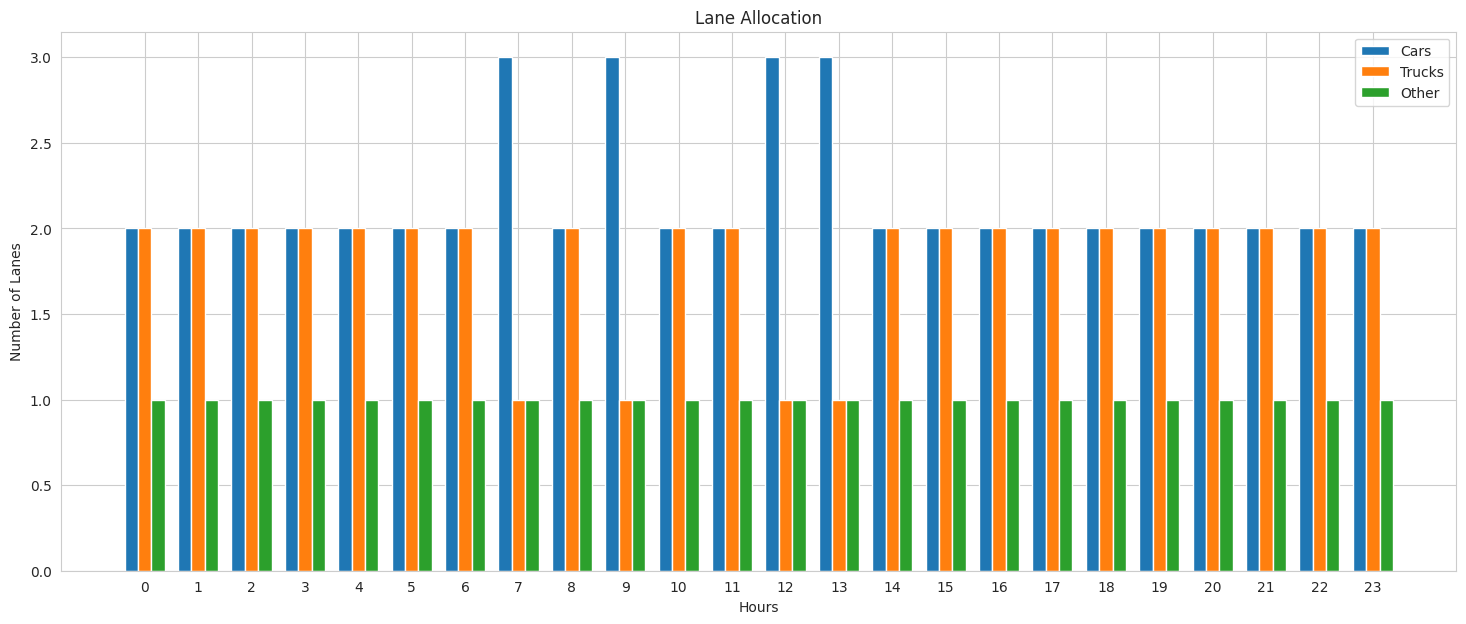

In [18]:
import numpy as np
import matplotlib.pyplot as plt

X = lane_allocation_df['hour']
Y1 = lane_allocation_df['hour_lane_car']
Y2 = lane_allocation_df['hour_lane_truck']
Y3 = lane_allocation_df['hour_lane_other']

X_axis = np.arange(len(X))

plt.figure(figsize = (18,7))

plt.bar(X_axis - 0.25, Y1, 0.25, label = 'Cars')
plt.bar(X_axis , Y2, 0.25, label = 'Trucks')
plt.bar(X_axis + 0.25, Y3, 0.25, label = 'Other')

plt.xticks(X_axis, X)
plt.xlabel("Hours")
plt.ylabel("Number of Lanes")
plt.title("Lane Allocation")
plt.legend()
plt.show()

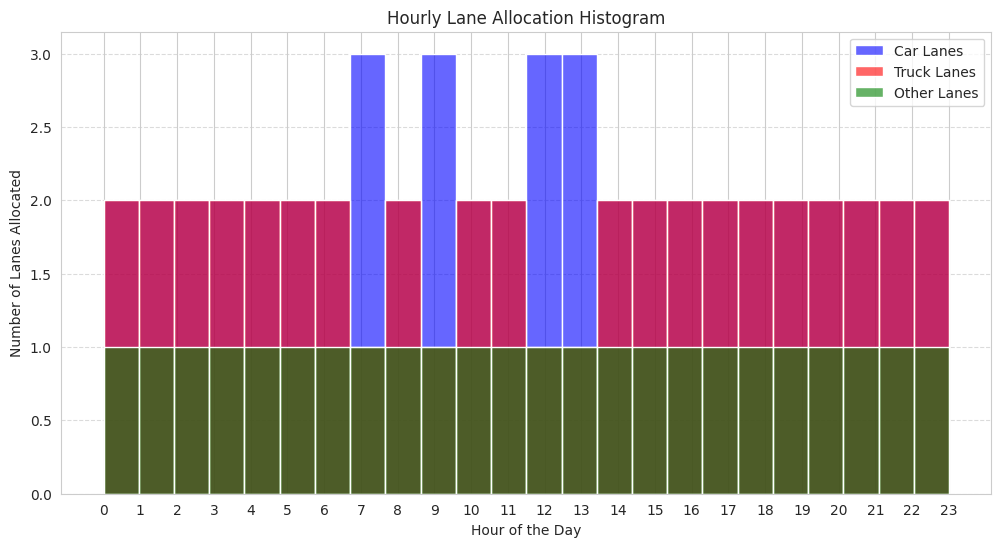

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style
sns.set_style("whitegrid")

# Convert hour to integer for better plotting
lane_allocation_df["hour"] = lane_allocation_df["hour"].astype(int)

# Plot histogram
plt.figure(figsize=(12, 6))

# Plot each lane type
sns.histplot(lane_allocation_df, x="hour", weights="hour_lane_car", bins=24, kde=False, color="blue", label="Car Lanes", alpha=0.6)
sns.histplot(lane_allocation_df, x="hour", weights="hour_lane_truck", bins=24, kde=False, color="red", label="Truck Lanes", alpha=0.6)
sns.histplot(lane_allocation_df, x="hour", weights="hour_lane_other", bins=24, kde=False, color="green", label="Other Lanes", alpha=0.6)

# Formatting
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Lanes Allocated")
plt.title("Hourly Lane Allocation Histogram")
plt.legend()
plt.xticks(range(0, 24))  # Ensure all hours are shown
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.show()


In [45]:
import plotly.express as px

USING RL

In [1]:
!pip install --no-cache-dir --force-reinstall stable-baselines3[extra]  --quiet


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.7/57.7 kB 173.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.9/101.9 kB 215.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 49.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 958.1/958.1 kB 275.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 166.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 134.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 766.7/766.7 MB 198.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 193.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 140.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 181.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [42]:
import gym
import numpy as np
import pandas as pd
import random
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from collections import deque
from stable_baselines3 import DQN
from stable_baselines3.common.envs import DummyVecEnv

# Load Hoskote toll data
df_hoskote = pd.read_csv("Bangalore1Day_NETC.csv")

# Extract hourly vehicle count
df_hoskote['initiated_time'] = pd.to_datetime(df_hoskote['initiated_time'], format='%H:%M', errors='coerce')
df_hoskote['hour'] = df_hoskote['initiated_time'].dt.strftime("%H")
traffic_data = df_hoskote.groupby('hour').size().to_dict()

# Define RL Environment
class TollLaneEnv(gym.Env):
    def __init__(self):
        super(TollLaneEnv, self).__init__()
        self.action_space = gym.spaces.Discrete(3)  # 0: Reduce lanes, 1: Keep same, 2: Increase lanes
        self.observation_space = gym.spaces.Box(low=0, high=5000, shape=(1,), dtype=np.float32)
        self.current_hour = 0
        self.current_traffic = list(traffic_data.values())[self.current_hour]
        self.lanes = 2  # Start with 2 lanes

    def step(self, action):
        # Apply action
        if action == 0:
            self.lanes = max(1, self.lanes - 1)  # Reduce lane
        elif action == 2:
            self.lanes += 1  # Increase lane

        # Calculate reward
        congestion = max(0, self.current_traffic - self.lanes * 1000)
        reward = -congestion  # Less congestion = higher reward

        # Move to next hour
        self.current_hour = (self.current_hour + 1) % 24
        self.current_traffic = list(traffic_data.values())[self.current_hour]
        done = self.current_hour == 23  # Reset at end of the day

        return np.array([self.current_traffic], dtype=np.float32), reward, done, {}

    def reset(self):
        self.current_hour = 0
        self.current_traffic = list(traffic_data.values())[self.current_hour]
        self.lanes = 2
        return np.array([self.current_traffic], dtype=np.float32)

# Train DQN Agent
env = DummyVecEnv([lambda: TollLaneEnv()])
model = DQN("MlpPolicy", env, verbose=1, learning_rate=0.001, buffer_size=5000, batch_size=32, gamma=0.95)

# Train for 10000 steps
model.learn(total_timesteps=10000)

# Save model
model.save("lane_optimization_dqn")

# Test agent
obs = env.reset()
for i in range(24):
    action, _ = model.predict(obs, deterministic=True)
    obs, reward, done, _ = env.step(action)
    print(f"Hour {i}: Action {action}, Reward: {reward}")


ModuleNotFoundError: No module named 'stable_baselines3'